In [56]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:75% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

In [57]:
from IPython.display import display, HTML

display(HTML('''
<div id="toc-container" style="
    position:fixed; top:60px; left:0; width:240px; 
    background:#f9f9f9; border-right:1px solid #ccc; 
    padding:10px; max-height:90%; overflow:auto; z-index:9999;
    font-family:Arial; font-size:14px;">
  <b>üìã Table of Contents</b>
  <ul id="toc-list" style="list-style-type:none; padding-left:0;"></ul>
</div>

<script>
function createTOC(){
  const toc = document.getElementById("toc-list");
  toc.innerHTML = "";
  const headers = document.querySelectorAll("h1, h2, h3");
  headers.forEach((h, i)=>{
    if(!h.id) h.id = "toc-" + i;
    const li = document.createElement("li");
    li.style.marginLeft = (parseInt(h.tagName[1]) - 1) * 10 + "px";
    li.innerHTML = '<a href="#' + h.id + '">' + h.innerText + '</a>';
    toc.appendChild(li);
  });
}
setTimeout(createTOC, 1000);
</script>
'''))

- 2013ÎÖÑÏù¥ÌõÑ Ï†ÑÍµ≠ ÏïÑÌååÌä∏Î∂ÑÏñëÍ∞ÄÍ≤©
- Í≥µÍ≥µÎç∞Ïù¥ÌÑ∞ Ìè¨ÌÑ∏Ïóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º PandasÏùò melt, concat, transposeÏôÄ Í∞ôÏùÄ reshape Í∏∞Îä•ÏùÑ ÌôúÏö©Ìï¥ Î∂ÑÏÑù
- groupby, pivot_table, info, describe, value_countsÎì±ÏùÑ ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩÍ≥º Î∂ÑÏÑù
- Ïù¥Î•º ÌÜµÌï¥ Ï†ÑÌòÄ Îã§Î•∏ Îëê Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏ†úÏôÄ Î≥ëÌï©, ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥Î•º Ïù¥Ìï¥ÌïòÍ≥† Îã§ÏñëÌïú Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. Ìå®ÌÇ§ÏßÄÎ°úÎìú & ÌïúÍ∏ÄÏÑ§Ï†ï & Í≤ΩÍ≥†Î©îÏÑ∏ÏßÄ ignore

In [2]:
# Ìå®ÌÇ§ÏßÄ import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ÏãúÍ∞ÅÌôîÏùò ÏÑ†Î™ÖÎèÑÎ•º ÎÜíÏûÑ
%config InlineBackend.figure_format = "retina"

# ÌïúÍ∏ÄÏÑ§Ï†ï
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # ÏúàÎèÑÏö∞Ï¶à
plt.rc('axes', unicode_minus=False) # Ï∂ïÏùò - Íπ®Ïßê Î∞©ÏßÄ

# Îã§Î•∏ Ìè∞Ìä∏Î•º Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú ÌïòÎ†§Î©¥
# from matplotlib.font_manager import FontProperties
# font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
# font_prop = FontProperties(fname=font_path, size=15)
# plt.rc('font', family=font_prop.get_name())

# warning(Í≤ΩÍ≥†) ÏïàÎ≥¥Ïù¥Í≤å
import warnings
warnings.filterwarnings(action='ignore')

# 2. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
- https://www.data.go.kr ÏóêÏÑú "ÏïÑÌååÌä∏ Î∂ÑÏñë Í∞ÄÍ≤©"ÏùÑ Í≤ÄÏÉâÌïú csv Îã§Ïö¥Î°úÎìú

## (1) 2013ÎÖÑ9ÏõîÎ∂ÄÌÑ∞ 2015ÎÖÑ8ÏõîÍπåÏßÄ Îç∞Ïù¥ÌÑ∞Îäî df_first Î≥ÄÏàòÏóê Îã¥ÏïÑ ÌÉêÏÉâ

In [3]:
df_first = pd.read_csv('D:/ai/downloads/shareData/Î∂ÄÎèôÏÇ∞/Ï†ÑÍµ≠ ÌèâÍ∑† ÌèâÎãπ Î∂ÑÏñëÍ∞ÄÍ≤©(2013ÎÖÑ 9ÏõîÎ∂ÄÌÑ∞ 2015ÎÖÑ 8ÏõîÍπåÏßÄ).csv',
                      encoding='cp949')
df_first.head(1)

ÏßÄÏó≠  2013ÎÖÑ12Ïõî  2014ÎÖÑ1Ïõî  2014ÎÖÑ2Ïõî  2014ÎÖÑ3Ïõî  2014ÎÖÑ4Ïõî  2014ÎÖÑ5Ïõî  2014ÎÖÑ6Ïõî  \
0  ÏÑúÏö∏     18189    17925    17925    18016    18098    19446    18867   

   2014ÎÖÑ7Ïõî  2014ÎÖÑ8Ïõî  ...  2014ÎÖÑ11Ïõî  2014ÎÖÑ12Ïõî  2015ÎÖÑ1Ïõî  2015ÎÖÑ2Ïõî  2015ÎÖÑ3Ïõî  \
0    18742    19274  ...     20242     20269    20670    20670    19415   

   2015ÎÖÑ4Ïõî  2015ÎÖÑ5Ïõî  2015ÎÖÑ6Ïõî  2015ÎÖÑ7Ïõî  2015ÎÖÑ8Ïõî  
0    18842    18367    18374    18152    18443  

[1 rows x 22 columns]

In [4]:
df_first.shape

(17, 22)

In [5]:
pd.options.display.max_columns=22 # ÏµúÎåÄ displayÍ∞ÄÎä•Ìïú Ïó¥Ïàò ÏàòÏ†ï
df_first.tail(1)

ÏßÄÏó≠  2013ÎÖÑ12Ïõî  2014ÎÖÑ1Ïõî  2014ÎÖÑ2Ïõî  2014ÎÖÑ3Ïõî  2014ÎÖÑ4Ïõî  2014ÎÖÑ5Ïõî  2014ÎÖÑ6Ïõî  \
16  Ï†úÏ£º      7674     7900     7900     7900     7900     7900     7914   

    2014ÎÖÑ7Ïõî  2014ÎÖÑ8Ïõî  2014ÎÖÑ9Ïõî  2014ÎÖÑ10Ïõî  2014ÎÖÑ11Ïõî  2014ÎÖÑ12Ïõî  2015ÎÖÑ1Ïõî  2015ÎÖÑ2Ïõî  \
16     7914     7914     7833      7724      7724      7739     7739     7739   

    2015ÎÖÑ3Ïõî  2015ÎÖÑ4Ïõî  2015ÎÖÑ5Ïõî  2015ÎÖÑ6Ïõî  2015ÎÖÑ7Ïõî  2015ÎÖÑ8Ïõî  
16     7826     7285     7285     7343     7343     7343

In [6]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ÏßÄÏó≠        17 non-null     object
 1   2013ÎÖÑ12Ïõî  17 non-null     int64 
 2   2014ÎÖÑ1Ïõî   17 non-null     int64 
 3   2014ÎÖÑ2Ïõî   17 non-null     int64 
 4   2014ÎÖÑ3Ïõî   17 non-null     int64 
 5   2014ÎÖÑ4Ïõî   17 non-null     int64 
 6   2014ÎÖÑ5Ïõî   17 non-null     int64 
 7   2014ÎÖÑ6Ïõî   17 non-null     int64 
 8   2014ÎÖÑ7Ïõî   17 non-null     int64 
 9   2014ÎÖÑ8Ïõî   17 non-null     int64 
 10  2014ÎÖÑ9Ïõî   17 non-null     int64 
 11  2014ÎÖÑ10Ïõî  17 non-null     int64 
 12  2014ÎÖÑ11Ïõî  17 non-null     int64 
 13  2014ÎÖÑ12Ïõî  17 non-null     int64 
 14  2015ÎÖÑ1Ïõî   17 non-null     int64 
 15  2015ÎÖÑ2Ïõî   17 non-null     int64 
 16  2015ÎÖÑ3Ïõî   17 non-null     int64 
 17  2015ÎÖÑ4Ïõî   17 non-null     int64 
 18  2015ÎÖÑ5Ïõî   17 non-null     int64 
 19  2015ÎÖÑ6Ïõî   17 n

In [7]:
df_first.isna().sum() # Ïó¥Î≥Ñ Í≤∞Ï∏°Ïπò Í∞ØÏàò

ÏßÄÏó≠          0
2013ÎÖÑ12Ïõî    0
2014ÎÖÑ1Ïõî     0
2014ÎÖÑ2Ïõî     0
2014ÎÖÑ3Ïõî     0
2014ÎÖÑ4Ïõî     0
2014ÎÖÑ5Ïõî     0
2014ÎÖÑ6Ïõî     0
2014ÎÖÑ7Ïõî     0
2014ÎÖÑ8Ïõî     0
2014ÎÖÑ9Ïõî     0
2014ÎÖÑ10Ïõî    0
2014ÎÖÑ11Ïõî    0
2014ÎÖÑ12Ïõî    0
2015ÎÖÑ1Ïõî     0
2015ÎÖÑ2Ïõî     0
2015ÎÖÑ3Ïõî     0
2015ÎÖÑ4Ïõî     0
2015ÎÖÑ5Ïõî     0
2015ÎÖÑ6Ïõî     0
2015ÎÖÑ7Ïõî     0
2015ÎÖÑ8Ïõî     0
dtype: int64

- color map Ï∞∏Ï°∞ : https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [4]:
df_first_heat = df_first.set_index('ÏßÄÏó≠')
df_first_heat.sample(1)

NameError: name 'df_first' is not defined

In [5]:
plt.figure(figsize=(30,10))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.show()

NameError: name 'df_first_heat' is not defined

<Figure size 3000x1000 with 0 Axes>

## (2) Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îäî df_last Î≥ÄÏàòÏóê Îã¥ÏïÑ ÌÉêÏÉâ

In [6]:
df_last = pd.read_csv('C:/Users/darks/Desktop/ÏûêÎ£åÎì§/AIÏûêÎ£å/ai/source/01_python/data/Ï£ºÌÉùÎèÑÏãúÎ≥¥Ï¶ùÍ≥µÏÇ¨_Ï†ÑÍµ≠ Ïã†Í∑ú ÎØºÍ∞ÑÏïÑÌååÌä∏ Î∂ÑÏñëÍ∞ÄÍ≤© ÎèôÌñ•_20241231.csv',
                     encoding ='cp949')

df_last.head()

ÏßÄÏó≠Î™Ö                     Í∑úÎ™®Íµ¨Î∂Ñ    Ïó∞ÎèÑ   Ïõî Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)
0  ÏÑúÏö∏                     Î™®Îì†Î©¥Ï†Å  2015  10       5841
1  ÏÑúÏö∏            Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10       5652
2  ÏÑúÏö∏   Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10       5882
3  ÏÑúÏö∏  Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10       5721
4  ÏÑúÏö∏           Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º  2015  10       5879

In [7]:
# Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩÌïòÍ∏∞
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ÏßÄÏó≠Î™Ö         9095 non-null   object
 1   Í∑úÎ™®Íµ¨Î∂Ñ        9095 non-null   object
 2   Ïó∞ÎèÑ          9095 non-null   int64 
 3   Ïõî           9095 non-null   int64 
 4   Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_lastÏùò Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏ÌïòÍ≥† ÎåÄÏ≤¥ Í≥†ÎØº

In [8]:
# Ïó¥Î≥Ñ Í≤∞Ï∏°Ïπò Í∞ØÏàò
df_last.isnull().sum()
df_last.isna().sum()

ÏßÄÏó≠Î™Ö             0
Í∑úÎ™®Íµ¨Î∂Ñ            0
Ïó∞ÎèÑ              0
Ïõî               0
Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)    614
dtype: int64

In [9]:
# Ïó¥Î≥Ñ Í≤∞Ï∏°ÏπòÎ•º Ï†úÏô∏Ìïú Í∞ØÏàò
df_last.notnull().sum()
df_last.notna().sum()

ÏßÄÏó≠Î™Ö           9095
Í∑úÎ™®Íµ¨Î∂Ñ          9095
Ïó∞ÎèÑ            9095
Ïõî             9095
Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)    8481
dtype: int64

In [10]:
# 'Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)' Ïª¨ÎüºÏùò Í≤∞Ï∏°Ïπò Í∞ØÏàòÏôÄ Í≤∞Ï∏°ÏπòÍ∞Ä ÏïÑÎãå Í∞ØÏàò, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò
print('Ï†ÑÏ≤¥ Í∞ØÏàò :', len(df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']), df_last.shape[0])
print('Í≤∞Ï∏°ÏπòÍ∞Ä ÏïÑÎãå Í∞ØÏàò :', df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].notnull().sum())
print('Í≤∞Ï∏°ÏπòÍ∞Ä ÏïÑÎãå Í∞ØÏàò :', df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].notna().sum())
print('Í≤∞Ï∏°Ïπò Í∞ØÏàò :', df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].isnull().sum())
print('Í≤∞Ï∏°Ïπò Í∞ØÏàò :', df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].isna().sum())

Ï†ÑÏ≤¥ Í∞ØÏàò : 9095 9095
Í≤∞Ï∏°ÏπòÍ∞Ä ÏïÑÎãå Í∞ØÏàò : 8481
Í≤∞Ï∏°ÏπòÍ∞Ä ÏïÑÎãå Í∞ØÏàò : 8481
Í≤∞Ï∏°Ïπò Í∞ØÏàò : 614
Í≤∞Ï∏°Ïπò Í∞ØÏàò : 614


# 4. df_last Îç∞Ïù¥ÏÖãÏóê ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©Ïª¨Îüº Ï∂îÍ∞Ä

## (1) astype('float')ÎÇò pd.to_numeric() ÏÇ¨Ïö©
## (2) 6,222 => 6222 ÏàòÏ†ï, spaceÍ∞Ä Ï†ÄÏû•Îêú Í≤ΩÏö∞ nanÏúºÎ°ú ÏàòÏ†ïÌïòÎäî Ìï®ÏàòÎ•º applyÎÇò mapÏ†ÅÏö©
## (3) df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']*3.3

In [11]:
df_last.loc[0,'Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']

'5841'

In [12]:
# df_last.groupby('ÏßÄÏó≠Î™Ö')['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].mean() ÏóêÎü¨ÎÇ®
# df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'] * 3.3 ÏóêÎü¨ÎÇ®

In [13]:
# df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].astype('float') #'  ', '6,244' -> ÏóêÎü¨ÎÇ®
#pd.to_numeric?
# Ïà´ÏûêÎ°ú Î≥ÄÍ≤ΩÌï† Îïå ÏòàÏô∏Î∞úÏÉùÏãú ÏòàÏô∏Î∞úÏÉùÎßêÍ≥† NaNÏúºÎ°ú
pd.to_numeric(df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'], 
              errors='coerce').isna().sum() # ÏõêÎûòÍ≤∞Ï∏°ÏπòÍ∞ØÏàò(614)

744

In [14]:
# Î∂ÑÏñëÍ∞ÄÍ≤©Ïóê spaceÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ : 28, 29, 34, ...
df_last[df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].str.strip() == ''].shape

(126, 5)

In [15]:
df_last.loc[df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].str.strip() == '', 
            'ÏßÄÏó≠Î™Ö'].value_counts()

ÏÑ∏Ï¢Ö    30
Ï†úÏ£º    19
ÎåÄÍµ¨    19
Í¥ëÏ£º    12
Ï†ÑÎÇ®    11
ÎåÄÏ†Ñ    10
Ïö∏ÏÇ∞    10
Ï†ÑÎ∂Å     8
Í≤ΩÎÇ®     5
ÏÑúÏö∏     2
Name: ÏßÄÏó≠Î™Ö, dtype: int64

In [16]:
# Î∂ÑÏñëÍ∞ÄÍ≤©Ïóê ,Í∞Ä ÏûàÎäî Í≤ΩÏö∞
df_last[df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].notnull() &
    (df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].str.find(',')!=-1) ]

ÏßÄÏó≠Î™Ö                     Í∑úÎ™®Íµ¨Î∂Ñ    Ïó∞ÎèÑ   Ïõî Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)
80  Ï†úÏ£º                     Î™®Îì†Î©¥Ï†Å  2015  10      2,232
82  Ï†úÏ£º   Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      2,225
83  Ï†úÏ£º  Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      2,583
84  Ï†úÏ£º           Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º  2015  10      2,574

### apply
- apply(Ìï®Ïàò, axis) : 1Ï∞®Ïõê, 2Ï∞®Ïõê(axis ÏßÄÏ†ï. axisÍ∏∞Î≥∏Í∞í0)
- map(Ìï®Ïàò) : 1Ï∞®Ïõê
- applymap(Ìï®Ïàò) : 2Ï∞®Ïõê(Î™®Îì† ÏöîÏÜåÎì§Ïóê Ìï®ÏàòÎ•º Ï†ÅÏö©)

In [17]:
# ÏΩ§ÎßàÍ∞Ä ÏûàÎäî Î¨∏ÏûêÏóêÏÑú ÏΩ§Îßà ÏóÜÏï†Í∏∞ Î∞©Î≤ï1
temp = '12,523'
temp.replace(',','')

'12523'

In [18]:
# ÏΩ§ÎßàÍ∞Ä ÏûàÎäî Î¨∏ÏûêÏóêÏÑú ÏΩ§Îßà ÏóÜÏï†Í∏∞ Î∞©Î≤ï2
temp = '12,523'
tempsplited = temp.split(',')
''.join(tempsplited)

'12523'

In [19]:
df_last.loc[368]

ÏßÄÏó≠Î™Ö                                Í¥ëÏ£º
Í∑úÎ™®Íµ¨Î∂Ñ          Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò
Ïó∞ÎèÑ                               2016
Ïõî                                   2
Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)                        NaN
Name: 368, dtype: object

In [20]:
# Î∂ÑÏñëÍ∞ÄÍ≤© Ïª¨ÎüºÏóê ÏΩ§Îßà(,)Í∞Ä ÏûàÎäî Í≤ΩÏö∞ ÏΩ§Îßà(,)Î•º Ï†úÍ±∞('5,123' -> 5123 / '5123' -> 5123)
# Í≥µÎ∞±Î¨∏ÏûêÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ np.nanÎ°ú Î∞îÍæ∏Îäî Ìï®Ïàò
def commadrop(row):
    row = row.copy()
    price = row['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']
    # price(Ïä§ÏπºÎùºÎç∞Ïù¥ÌÑ∞)Í∞Ä Í≤∞Ï∏°ÏπòÏù∏ÏßÄ Ïó¨Î∂Ä
        # (1) price is np.nan : Í∞íÏùò ÌÉÄÏûÖÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ nanÏù∏ÏßÄ Ïó¨Î∂Ä
        # (2) pd.isna(price), pd.isnull(Í∞í) : Í∞íÏùò ÌÉÄÏûÖÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ nanÏù∏ÏßÄ Ïó¨Î∂Ä
        # (3) np.isnan(Ïà´ÏûêÎç∞Ïù¥ÌÑ∞): Í∞íÏù¥ Ïà´ÏûêÍ∞Ä ÏïÑÎãê Í≤ΩÏö∞ ÏóêÎü¨. Ïà´ÏûêÏùºÍ≤ΩÏö∞ nanÏù∏ÏßÄ Ïó¨Î∂Ä
    if price is np.nan:
        pass
    elif price.strip() == '': # spaceÎ©¥ Í≤∞Ï∏°ÏπòÎ°ú
        row['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'] = np.nan
    elif price.find(',') != -1: # ÏΩ§Îßà(,)Í∞Ä ÏûàÏúºÎ©¥ ,ÏóÜÏï†Í≥† floatÌòïÎ≥ÄÌôò
        pricesplited = price.split(',')
        row['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'] = float(''.join(pricesplited))
    else:
        row['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'] = float(price)
    return row
    
commadrop(df_last.loc[80]) # ÏΩ§Îßà Ï†úÏô∏
commadrop(df_last.loc[1]) # Í∑∏ÎåÄÎ°ú
commadrop(df_last.loc[28]) # Í≥µÎ∞±Î¨∏ÏûêÏùò Í≤ΩÏö∞ nan
commadrop(df_last.loc[368]) # nanÏùò Í≤ΩÏö∞ nan

ÏßÄÏó≠Î™Ö                                Í¥ëÏ£º
Í∑úÎ™®Íµ¨Î∂Ñ          Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò
Ïó∞ÎèÑ                               2016
Ïõî                                   2
Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)                        NaN
Name: 368, dtype: object

In [21]:
# Í≥µÎ∞±Î¨∏ÏûêÎäî Í≤∞Ï∏°ÏπòÎ°ú, ÏΩ§ÎßàÎäî Ï†úÍ±∞ÌïòÍ∏∞Î•º Î™®Îì† ÌñâÏóê Ï†ÅÏö©
df_last.apply(commadrop, axis=1)

ÏßÄÏó≠Î™Ö                     Í∑úÎ™®Íµ¨Î∂Ñ    Ïó∞ÎèÑ   Ïõî  Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)
0     ÏÑúÏö∏                     Î™®Îì†Î©¥Ï†Å  2015  10      5841.0
1     ÏÑúÏö∏            Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5652.0
2     ÏÑúÏö∏   Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5882.0
3     ÏÑúÏö∏  Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5721.0
4     ÏÑúÏö∏           Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º  2015  10      5879.0
...   ..                      ...   ...  ..         ...
9090  Ï†úÏ£º                     Î™®Îì†Î©¥Ï†Å  2024   8      7703.0
9091  Ï†úÏ£º            Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2024   8         NaN
9092  Ï†úÏ£º   Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2024   8      7515.0
9093  Ï†úÏ£º  Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2024   8         NaN
9094  Ï†úÏ£º           Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º  2024   8      7950.0

[9095 rows x 5 columns]

In [22]:
df_last.apply(commadrop, axis=1).isna().sum()

ÏßÄÏó≠Î™Ö             0
Í∑úÎ™®Íµ¨Î∂Ñ            0
Ïó∞ÎèÑ              0
Ïõî               0
Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)    740
dtype: int64

### map

In [23]:
# Í≤∞Ï∏°Ïπò->Í≤∞Ï∏°Ïπò return, Í≥µÎ∞±Î¨∏Ïûê->Í≤∞Ï∏°Ïπò return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        pricesplited = price.split(',')
        return float(''.join(pricesplited))
    else:
        return float(price)

commadrop2(df_last.loc[80, 'Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']) # ÏΩ§ÎßàÏ†úÏô∏Ìïú Î¨∏ÏûêÎ•º Ïà´ÏûêÎ°ú 
commadrop2(df_last.loc[1, 'Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']) # ÏΩ§ÎßàÏóÜÎäî Î¨∏ÏûêÎ•º Ïà´ÏûêÎ°ú 
commadrop2(df_last.loc[28, 'Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']) # Í≥µÎ∞±Î¨∏ÏûêÎ•º nan
commadrop2(df_last.loc[368, 'Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']) # nanÏùÑ nan

nan

- apply(Ìï®Ïàò, axis) : 1Ï∞®Ïõê, 2Ï∞®Ïõê(axis ÏßÄÏ†ï. axisÍ∏∞Î≥∏Í∞í0)
- map(Ìï®Ïàò) : 1Ï∞®Ïõê
- applymap(Ìï®Ïàò) : 2Ï∞®Ïõê(Î™®Îì† ÏöîÏÜåÎì§Ïóê Ìï®ÏàòÎ•º Ï†ÅÏö©)

In [24]:
df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].apply(commadrop2)
df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].map(commadrop2)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞), Length: 9095, dtype: float64

### applyÎÇò mapÏÇ¨Ïö© Ïïà ÌïòÍ∏∞

In [25]:
pd.to_numeric(df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].str.strip().str.replace(',','')).isna().sum()

740

In [26]:
df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'] = \
    pd.to_numeric(df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'].str.strip().str.replace(',',''))

In [27]:
# 80(ÏΩ§ÎßàÏûàÏóàÎçò Ìñâ), 28(Í≥µÎ∞±Î¨∏Ïûê), 368(Í≤∞Ï∏°Ïπò)
df_last.loc[80]
df_last.loc[28]
df_last.loc[368]
df_last.loc[1]

ÏßÄÏó≠Î™Ö                      ÏÑúÏö∏
Í∑úÎ™®Íµ¨Î∂Ñ          Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò
Ïó∞ÎèÑ                     2015
Ïõî                        10
Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)           5652.0
Name: 1, dtype: object

In [28]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ÏßÄÏó≠Î™Ö         9095 non-null   object 
 1   Í∑úÎ™®Íµ¨Î∂Ñ        9095 non-null   object 
 2   Ïó∞ÎèÑ          9095 non-null   int64  
 3   Ïõî           9095 non-null   int64  
 4   Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)  8355 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [29]:
df_last['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'] = df_last['Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)']*3.3
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ÏßÄÏó≠Î™Ö         9095 non-null   object 
 1   Í∑úÎ™®Íµ¨Î∂Ñ        9095 non-null   object 
 2   Ïó∞ÎèÑ          9095 non-null   int64  
 3   Ïõî           9095 non-null   int64  
 4   Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)  8355 non-null   float64
 5   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [30]:
df_last['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].describe()

count     8355.000000
mean     13032.995512
std       5729.523419
min       6164.400000
25%       9038.700000
50%      11513.700000
75%      15034.800000
max      61917.900000
Name: ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©, dtype: float64

# 5. df_last Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï†ÑÏö©Î©¥Ï†Å Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïúÎã§
- Ï†ÑÏö©Î©¥Ï†Å Ïª¨Îüº, ÌïÑÏöîÏóÜÎäî Ïª¨Îüº Ï≤òÎ¶¨Î°ú Î©îÎ™®Î¶¨ Ï†àÏïΩ

In [31]:
df_last.head()

ÏßÄÏó≠Î™Ö                     Í∑úÎ™®Íµ¨Î∂Ñ    Ïó∞ÎèÑ   Ïõî  Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
0  ÏÑúÏö∏                     Î™®Îì†Î©¥Ï†Å  2015  10      5841.0  19275.3
1  ÏÑúÏö∏            Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5652.0  18651.6
2  ÏÑúÏö∏   Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5882.0  19410.6
3  ÏÑúÏö∏  Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5721.0  18879.3
4  ÏÑúÏö∏           Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º  2015  10      5879.0  19400.7

In [32]:
df_last['Í∑úÎ™®Íµ¨Î∂Ñ'].unique()

array(['Î™®Îì†Î©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò', 'Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò',
       'Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò', 'Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º'], dtype=object)

In [33]:
# Ï†ÑÏö©Î©¥Ï†Å, Ïù¥Ìïò, ' ' ÏóÜÏï†Í∏∞, Ï†úÍ≥±ÎØ∏ÌÑ∞-> m¬≤(alt+0178), Ï¥àÍ≥º->~
x = 'Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò'
#x.replace('Ï†ÑÏö©Î©¥Ï†Å','').replace('Ïù¥Ìïò','').replace(' ','').replace('Ï†úÍ≥±ÎØ∏ÌÑ∞')~
import re
re.sub('Ï†ÑÏö©Î©¥Ï†Å|Ïù¥Ìïò| ', '', x).replace('Ï†úÍ≥±ÎØ∏ÌÑ∞', 'm¬≤').replace('Ï¥àÍ≥º','~')

'85m¬≤~102m¬≤'

In [34]:
# Î∞©Î≤ï1
df_last['Ï†ÑÏö©Î©¥Ï†Å'] = df_last['Í∑úÎ™®Íµ¨Î∂Ñ'].apply(lambda x : 
    re.sub('Ï†ÑÏö©Î©¥Ï†Å|Ïù¥Ìïò| ', '', x).replace('Ï†úÍ≥±ÎØ∏ÌÑ∞', 'm¬≤').replace('Ï¥àÍ≥º','~'))
df_last.head(2)

ÏßÄÏó≠Î™Ö           Í∑úÎ™®Íµ¨Î∂Ñ    Ïó∞ÎèÑ   Ïõî  Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©  Ï†ÑÏö©Î©¥Ï†Å
0  ÏÑúÏö∏           Î™®Îì†Î©¥Ï†Å  2015  10      5841.0  19275.3  Î™®Îì†Î©¥Ï†Å
1  ÏÑúÏö∏  Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5652.0  18651.6  60m¬≤

In [35]:
# Î∞©Î≤ï2
df_last['Ï†ÑÏö©Î©¥Ï†Å'] = df_last['Í∑úÎ™®Íµ¨Î∂Ñ'].apply(lambda x : x.replace('Ï†ÑÏö©Î©¥Ï†Å',''))
df_last['Ï†ÑÏö©Î©¥Ï†Å'] = df_last['Ï†ÑÏö©Î©¥Ï†Å'].apply(lambda x : x.replace('Ï†úÍ≥±ÎØ∏ÌÑ∞','m¬≤'))
df_last['Ï†ÑÏö©Î©¥Ï†Å'] = df_last['Ï†ÑÏö©Î©¥Ï†Å'].apply(lambda x : x.replace('Ï¥àÍ≥º','~'))
df_last['Ï†ÑÏö©Î©¥Ï†Å'] = df_last['Ï†ÑÏö©Î©¥Ï†Å'].apply(lambda x : x.replace('Ïù¥Ìïò',''))
df_last['Ï†ÑÏö©Î©¥Ï†Å'] = df_last['Ï†ÑÏö©Î©¥Ï†Å'].apply(lambda x : x.replace(' ',''))

In [36]:
# Î∞©Î≤ï3
df_last['Ï†ÑÏö©Î©¥Ï†Å'] = df_last['Í∑úÎ™®Íµ¨Î∂Ñ'].str.replace('Ï†ÑÏö©Î©¥Ï†Å', '')\
                                        .str.replace('Ï†úÍ≥±ÎØ∏ÌÑ∞','m¬≤')\
                                        .str.replace('Ï¥àÍ≥º','~')\
                                        .str.replace('Ïù¥Ìïò','')\
                                        .str.replace(' ','')
df_last.head()

ÏßÄÏó≠Î™Ö                     Í∑úÎ™®Íµ¨Î∂Ñ    Ïó∞ÎèÑ   Ïõî  Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©        Ï†ÑÏö©Î©¥Ï†Å
0  ÏÑúÏö∏                     Î™®Îì†Î©¥Ï†Å  2015  10      5841.0  19275.3        Î™®Îì†Î©¥Ï†Å
1  ÏÑúÏö∏            Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5652.0  18651.6        60m¬≤
2  ÏÑúÏö∏   Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5882.0  19410.6   60m¬≤~85m¬≤
3  ÏÑúÏö∏  Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò  2015  10      5721.0  18879.3  85m¬≤~102m¬≤
4  ÏÑúÏö∏           Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º  2015  10      5879.0  19400.7      102m¬≤~

In [37]:
print(df_last['Í∑úÎ™®Íµ¨Î∂Ñ'].unique())
print(df_last['Ï†ÑÏö©Î©¥Ï†Å'].unique())

['Î™®Îì†Î©¥Ï†Å' 'Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò' 'Ï†ÑÏö©Î©¥Ï†Å 60Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò' 'Ï†ÑÏö©Î©¥Ï†Å 85Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ïù¥Ìïò'
 'Ï†ÑÏö©Î©¥Ï†Å 102Ï†úÍ≥±ÎØ∏ÌÑ∞Ï¥àÍ≥º']
['Î™®Îì†Î©¥Ï†Å' '60m¬≤' '60m¬≤~85m¬≤' '85m¬≤~102m¬≤' '102m¬≤~']


# 6. Î©îÎ™®Î¶¨ ÏÇ¨Ïö©ÎüâÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞

In [38]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ÏßÄÏó≠Î™Ö         9095 non-null   object 
 1   Í∑úÎ™®Íµ¨Î∂Ñ        9095 non-null   object 
 2   Ïó∞ÎèÑ          9095 non-null   int64  
 3   Ïõî           9095 non-null   int64  
 4   Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)  8355 non-null   float64
 5   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©      8355 non-null   float64
 6   Ï†ÑÏö©Î©¥Ï†Å        9095 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 497.5+ KB


In [39]:
df_last.drop(['Í∑úÎ™®Íµ¨Î∂Ñ', 'Î∂ÑÏñëÍ∞ÄÍ≤©(Ï†úÍ≥±ÎØ∏ÌÑ∞)'], axis=1, inplace=True) # Ïó¥Ï†úÍ±∞
df_last

ÏßÄÏó≠Î™Ö    Ïó∞ÎèÑ   Ïõî   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©        Ï†ÑÏö©Î©¥Ï†Å
0     ÏÑúÏö∏  2015  10  19275.3        Î™®Îì†Î©¥Ï†Å
1     ÏÑúÏö∏  2015  10  18651.6        60m¬≤
2     ÏÑúÏö∏  2015  10  19410.6   60m¬≤~85m¬≤
3     ÏÑúÏö∏  2015  10  18879.3  85m¬≤~102m¬≤
4     ÏÑúÏö∏  2015  10  19400.7      102m¬≤~
...   ..   ...  ..      ...         ...
9090  Ï†úÏ£º  2024   8  25419.9        Î™®Îì†Î©¥Ï†Å
9091  Ï†úÏ£º  2024   8      NaN        60m¬≤
9092  Ï†úÏ£º  2024   8  24799.5   60m¬≤~85m¬≤
9093  Ï†úÏ£º  2024   8      NaN  85m¬≤~102m¬≤
9094  Ï†úÏ£º  2024   8  26235.0      102m¬≤~

[9095 rows x 5 columns]

In [40]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ÏßÄÏó≠Î™Ö     9095 non-null   object 
 1   Ïó∞ÎèÑ      9095 non-null   int64  
 2   Ïõî       9095 non-null   int64  
 3   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©  8355 non-null   float64
 4   Ï†ÑÏö©Î©¥Ï†Å    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [41]:
# Ïª¨Îüº ÏàúÏÑúÎ•º Î∞îÍøîÏÑú Î∞±ÏóÖ
# df_last = df_last[['ÏßÄÏó≠Î™Ö','Ï†ÑÏö©Î©¥Ï†Å', 'Ïó∞ÎèÑ', 'Ïõî', 'ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']]
col = df_last.pop('Ï†ÑÏö©Î©¥Ï†Å') # 'Ï†ÑÏö©Î©¥Ï†Å'Ïª¨Îüº ÎπºÏÑú colÎ≥ÄÏàò Ìï†Îãπ
df_last.insert(1, 'Ï†ÑÏö©Î©¥Ï†Å', col) # 1Î≤àÏß∏ Ïó¥Ïóê colÏ∂îÍ∞Ä
df_last.head()

ÏßÄÏó≠Î™Ö        Ï†ÑÏö©Î©¥Ï†Å    Ïó∞ÎèÑ   Ïõî   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
0  ÏÑúÏö∏        Î™®Îì†Î©¥Ï†Å  2015  10  19275.3
1  ÏÑúÏö∏        60m¬≤  2015  10  18651.6
2  ÏÑúÏö∏   60m¬≤~85m¬≤  2015  10  19410.6
3  ÏÑúÏö∏  85m¬≤~102m¬≤  2015  10  18879.3
4  ÏÑúÏö∏      102m¬≤~  2015  10  19400.7

In [42]:
df_last.to_csv('data/df_last.csv', index=False) # Ï†ÑÏ≤òÎ¶¨ Îã®Í≥Ñ Î∞±ÏóÖ

# 7. Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ
- GroupBy(unstack()Ìï®Ïàò Ïù¥Ïö©) vs. pivot_table()
- Ïö∞ÏÑ† Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥ÑÏôÄ ÏãúÍ∞ÅÌôîÎ•º Ìï† ÏòàÏ†ï

In [43]:
df_last = pd.read_csv('data/df_last.csv')
df_last.head()

ÏßÄÏó≠Î™Ö        Ï†ÑÏö©Î©¥Ï†Å    Ïó∞ÎèÑ   Ïõî   ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
0  ÏÑúÏö∏        Î™®Îì†Î©¥Ï†Å  2015  10  19275.3
1  ÏÑúÏö∏        60m¬≤  2015  10  18651.6
2  ÏÑúÏö∏   60m¬≤~85m¬≤  2015  10  19410.6
3  ÏÑúÏö∏  85m¬≤~102m¬≤  2015  10  18879.3
4  ÏÑúÏö∏      102m¬≤~  2015  10  19400.7

- df_last.groupby(["Ïù∏Îç±Ïä§Î°úÏÇ¨Ïö©Ìï†Ïª¨ÎüºÎ™Ö"])["Í≥ÑÏÇ∞Ìï†Ïª¨ÎüºÎ™Ö"].Ïó∞ÏÇ∞Ìï®Ïàò()
- df_last.pivot_table(index=["Ïù∏Îç±Ïä§Î°úÏÇ¨Ïö©Ìï†Ïª¨ÎüºÎ™Ö"],
                    values=["Í≥ÑÏÇ∞Ìï†Ïª¨ÎüºÎ™Ö"],
                    aggfunc="Ïó∞ÏÇ∞Ìï®ÏàòÎ™Ö")
- pd.pivot_table(df_last, index=["Ïù∏Îç±Ïä§Î°úÏÇ¨Ïö©Ìï†Ïª¨ÎüºÎ™Ö"],
                    values=["Í≥ÑÏÇ∞Ìï†Ïª¨ÎüºÎ™Ö"],
                    aggfunc="Ïó∞ÏÇ∞Ìï®ÏàòÎ™Ö")

## (1) ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞Ïàò

In [44]:
# ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò(Í≤∞Ï∏°Ïπò Ìè¨Ìï®)
df_last['ÏßÄÏó≠Î™Ö'].value_counts() # Ï†ïÎ†¨ÍπåÏßÄ

ÏÑúÏö∏    535
Í∞ïÏõê    535
Í≤ΩÎÇ®    535
Í≤ΩÎ∂Å    535
Ï†ÑÎÇ®    535
Ï†ÑÎ∂Å    535
Ï∂©ÎÇ®    535
Ï∂©Î∂Å    535
ÏÑ∏Ï¢Ö    535
Ïù∏Ï≤ú    535
Ïö∏ÏÇ∞    535
ÎåÄÏ†Ñ    535
Í¥ëÏ£º    535
ÎåÄÍµ¨    535
Î∂ÄÏÇ∞    535
Í≤ΩÍ∏∞    535
Ï†úÏ£º    535
Name: ÏßÄÏó≠Î™Ö, dtype: int64

In [45]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìñâ Í∞ØÏàò(Í≤∞Ï∏°Ïπò Ï†úÏô∏) : Í≤∞Í≥ºÍ∞Ä 1Ï∞®Ïõê ÏãúÎ¶¨Ï¶à - groupby
df_last.groupby(['ÏßÄÏó≠Î™Ö'])['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].count().sort_values(
                                    # ascending=False ÎÇ¥Î¶ºÏ∞®Ïàú
)

ÏßÄÏó≠Î™Ö
Ïö∏ÏÇ∞    395
ÏÑ∏Ï¢Ö    409
ÎåÄÏ†Ñ    415
Ï†úÏ£º    439
Í¥ëÏ£º    450
ÎåÄÍµ¨    495
Ï†ÑÎÇ®    507
Í≤ΩÎ∂Å    511
Í≤ΩÎÇ®    516
Ï∂©ÎÇ®    516
Ï†ÑÎ∂Å    520
Í∞ïÏõê    523
ÏÑúÏö∏    527
Ïù∏Ï≤ú    531
Î∂ÄÏÇ∞    533
Ï∂©Î∂Å    533
Í≤ΩÍ∏∞    535
Name: ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©, dtype: int64

In [46]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìñâ Í∞ØÏàò(Í≤∞Ï∏°Ïπò Ï†úÏô∏) : Í≤∞Í≥ºÍ∞Ä 2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ - groupby
#1
df_last.groupby(['ÏßÄÏó≠Î™Ö'])[['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']].count().sort_values(
    by='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©', ascending=False
)
# 2
df_last.groupby(['ÏßÄÏó≠Î™Ö'])['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].count().sort_values(
                                    # ascending=False ÎÇ¥Î¶ºÏ∞®Ïàú
).to_frame()
# 3
df_last.groupby(['ÏßÄÏó≠Î™Ö'])['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].count().reset_index().sort_values(
    by='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©', ascending=False
)
# 4
df_last.groupby(['ÏßÄÏó≠Î™Ö'], as_index=False)['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].count().sort_values(
    by='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©', ascending=False
)
# 5
df_last.groupby(['ÏßÄÏó≠Î™Ö'])[['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']].count().sort_values(
    by='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©', ascending=False
).T

ÏßÄÏó≠Î™Ö      Í≤ΩÍ∏∞   Ï∂©Î∂Å   Î∂ÄÏÇ∞   Ïù∏Ï≤ú   ÏÑúÏö∏   Í∞ïÏõê   Ï†ÑÎ∂Å   Í≤ΩÎÇ®   Ï∂©ÎÇ®   Í≤ΩÎ∂Å   Ï†ÑÎÇ®   ÎåÄÍµ¨   Í¥ëÏ£º   Ï†úÏ£º  \
ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©  535  533  533  531  527  523  520  516  516  511  507  495  450  439   

ÏßÄÏó≠Î™Ö      ÎåÄÏ†Ñ   ÏÑ∏Ï¢Ö   Ïö∏ÏÇ∞  
ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©  415  409  395

In [47]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìñâ Í∞ØÏàò(Í≤∞Ï∏°Ïπò Ï†úÏô∏) : Í≤∞Í≥ºÍ∞Ä 2Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ - pivot_table
df_last.pivot_table(index=['ÏßÄÏó≠Î™Ö'],
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©',
                   aggfunc='count')
pd.pivot_table(df_last, index='ÏßÄÏó≠Î™Ö',
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©',
                   aggfunc='count').transpose()

ÏßÄÏó≠Î™Ö      Í∞ïÏõê   Í≤ΩÍ∏∞   Í≤ΩÎÇ®   Í≤ΩÎ∂Å   Í¥ëÏ£º   ÎåÄÍµ¨   ÎåÄÏ†Ñ   Î∂ÄÏÇ∞   ÏÑúÏö∏   ÏÑ∏Ï¢Ö   Ïö∏ÏÇ∞   Ïù∏Ï≤ú   Ï†ÑÎÇ®   Ï†ÑÎ∂Å  \
ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©  523  535  516  511  450  495  415  533  527  409  395  531  507  520   

ÏßÄÏó≠Î™Ö      Ï†úÏ£º   Ï∂©ÎÇ®   Ï∂©Î∂Å  
ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©  439  516  533

## (2) ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(ÌèâÍ∑†, ÏµúÎåÄÍ∞í, ... ÏöîÏïΩÌÜµÍ≥ÑÎüâ)

In [48]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÏµúÎåÄÍ∞í
df_last.groupby('ÏßÄÏó≠Î™Ö')[['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']].max().sort_values('ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©').head()

ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
ÏßÄÏó≠Î™Ö         
Ï∂©Î∂Å   13685.1
Ï†ÑÎ∂Å   14774.1
Ï∂©ÎÇ®   14932.5
Ï†ÑÎÇ®   15087.6
Í≤ΩÎ∂Å   15345.0

In [49]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÌèâÍ∑†
df_last.groupby('ÏßÄÏó≠Î™Ö')[['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']].mean().sort_values('ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©').head()

ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
ÏßÄÏó≠Î™Ö              
Ï†ÑÎ∂Å    8886.201923
Ï∂©Î∂Å    8896.583302
Ï†ÑÎÇ®    9224.326627
Ï∂©ÎÇ®    9769.541279
Í∞ïÏõê   10078.717400

In [50]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÌÜµÍ≥ÑÏöîÏïΩÏ†ïÎ≥¥
# desribe(Îç∞Ïù¥ÌÑ∞Í∞ØÏàò, ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÏÜåÍ∞í, Q1, Q2, Q2, ÏµúÎåÄÍ∞í
df_last.groupby('ÏßÄÏó≠Î™Ö')['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].describe().applymap(
    lambda x : round(x, 1)
)

df_last.groupby('ÏßÄÏó≠Î™Ö')['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].describe().round(1)

count     mean     std      min      25%      50%      75%      max
ÏßÄÏó≠Î™Ö                                                                     
Í∞ïÏõê   523.0  10078.7  2828.9   6639.6   7652.7   9428.1  11873.4  17806.8
Í≤ΩÍ∏∞   535.0  15420.0  3245.9  10160.7  13274.2  14652.0  17168.2  24172.5
Í≤ΩÎÇ®   516.0  10777.0  2223.6   7260.0   9187.2  10254.8  12031.8  16566.0
Í≤ΩÎ∂Å   511.0  10261.6  2276.0   6949.8   8378.7   9705.3  12500.4  15345.0
Í¥ëÏ£º   450.0  12998.2  3637.6   7428.3   9554.3  12673.6  15213.0  24951.3
ÎåÄÍµ¨   495.0  14434.5  3407.3   8259.9  11949.3  14711.4  16338.3  30600.9
ÎåÄÏ†Ñ   415.0  12829.6  4191.7   8002.5   9401.7  11820.6  15310.4  30851.7
Î∂ÄÏÇ∞   533.0  14896.9  4059.9   9669.0  12467.4  13411.2  17301.9  31904.4
ÏÑúÏö∏   527.0  27755.4  6566.4  16701.3  22497.8  26763.0  31054.6  61917.9
ÏÑ∏Ï¢Ö   409.0  10741.8  1638.8   8487.6   9101.4  10523.7  12266.1  21087.0
Ïö∏ÏÇ∞   395.0  13958.2  4060.2   7992.6  10312.5  13827.0  17602.2  27815.7
Ïù∏Ï≤ú   531.0  14513.2  3999.9   9537.0  11398.2  14652.0  16214.6  54723.9
Ï†ÑÎÇ®   507.0   9224.3  2092.0   6289.8   7613.1   8669.1  10627.7  15087.6
Ï†ÑÎ∂Å   520.0   8886.2  1660.7   6270.0   7661.8   8679.0   9986.6  14774.1
Ï†úÏ£º   439.0  15912.4  6039.0   7342.5  10645.8  13500.3  21908.7  27753.0
Ï∂©ÎÇ®   516.0   9769.5  2000.6   6926.7   8141.1   9124.5  11740.6  14932.5
Ï∂©Î∂Å   533.0   8896.6  1769.5   6164.4   7543.8   8596.5   9906.6  13685.1

In [51]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÏµúÎåÄÍ∞í
df_last.pivot_table(index=['ÏßÄÏó≠Î™Ö'],
                   values=['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'],
                   aggfunc='max')
pd.pivot_table(df_last, index=['ÏßÄÏó≠Î™Ö'],
                   values=['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'],
                   aggfunc='max').iloc[:3]

ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
ÏßÄÏó≠Î™Ö         
Í∞ïÏõê   17806.8
Í≤ΩÍ∏∞   24172.5
Í≤ΩÎÇ®   16566.0

In [52]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÌèâÍ∑†
df_last.pivot_table(index=['ÏßÄÏó≠Î™Ö'],
                   values=['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'])
pd.pivot_table(df_last, index=['ÏßÄÏó≠Î™Ö'],
                   values=['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']).iloc[:3]

ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
ÏßÄÏó≠Î™Ö              
Í∞ïÏõê   10078.717400
Í≤ΩÍ∏∞   15420.030280
Í≤ΩÎÇ®   10776.955814

In [53]:
# ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÌÜµÍ≥ÑÏöîÏïΩÏ†ïÎ≥¥
r = df_last.pivot_table(index=['ÏßÄÏó≠Î™Ö'],
                   values=['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'],
                   #values = 'ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©' ,
                   aggfunc='describe')
r.columns = r.columns.droplevel(0)
r

25%       50%        75%  count      max          mean      min  \
ÏßÄÏó≠Î™Ö                                                                          
Í∞ïÏõê    7652.700   9428.10  11873.400  523.0  17806.8  10078.717400   6639.6   
Í≤ΩÍ∏∞   13274.250  14652.00  17168.250  535.0  24172.5  15420.030280  10160.7   
Í≤ΩÎÇ®    9187.200  10254.75  12031.800  516.0  16566.0  10776.955814   7260.0   
Í≤ΩÎ∂Å    8378.700   9705.30  12500.400  511.0  15345.0  10261.553425   6949.8   
Í¥ëÏ£º    9554.325  12673.65  15213.000  450.0  24951.3  12998.216000   7428.3   
ÎåÄÍµ¨   11949.300  14711.40  16338.300  495.0  30600.9  14434.520000   8259.9   
ÎåÄÏ†Ñ    9401.700  11820.60  15310.350  415.0  30851.7  12829.565060   8002.5   
Î∂ÄÏÇ∞   12467.400  13411.20  17301.900  533.0  31904.4  14896.949156   9669.0   
ÏÑúÏö∏   22497.750  26763.00  31054.650  527.0  61917.9  27755.404554  16701.3   
ÏÑ∏Ï¢Ö    9101.400  10523.70  12266.100  409.0  21087.0  10741.830807   8487.6   
Ïö∏ÏÇ∞   10312.500  13827.00  17602.200  395.0  27815.7  13958.197975   7992.6   
Ïù∏Ï≤ú   11398.200  14652.00  16214.550  531.0  54723.9  14513.232203   9537.0   
Ï†ÑÎÇ®    7613.100   8669.10  10627.650  507.0  15087.6   9224.326627   6289.8   
Ï†ÑÎ∂Å    7661.775   8679.00   9986.625  520.0  14774.1   8886.201923   6270.0   
Ï†úÏ£º   10645.800  13500.30  21908.700  439.0  27753.0  15912.434624   7342.5   
Ï∂©ÎÇ®    8141.100   9124.50  11740.575  516.0  14932.5   9769.541279   6926.7   
Ï∂©Î∂Å    7543.800   8596.50   9906.600  533.0  13685.1   8896.583302   6164.4   

             std  
ÏßÄÏó≠Î™Ö               
Í∞ïÏõê   2828.907867  
Í≤ΩÍ∏∞   3245.863323  
Í≤ΩÎÇ®   2223.562736  
Í≤ΩÎ∂Å   2276.026239  
Í¥ëÏ£º   3637.557312  
ÎåÄÍµ¨   3407.303427  
ÎåÄÏ†Ñ   4191.685609  
Î∂ÄÏÇ∞   4059.939958  
ÏÑúÏö∏   6566.391764  
ÏÑ∏Ï¢Ö   1638.790167  
Ïö∏ÏÇ∞   4060.178889  
Ïù∏Ï≤ú   3999.854344  
Ï†ÑÎÇ®   2092.041133  
Ï†ÑÎ∂Å   1660.650118  
Ï†úÏ£º   6039.013382  
Ï∂©ÎÇ®   2000.592843  
Ï∂©Î∂Å   1769.454740

## (3) Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(ÌèâÍ∑†)

In [54]:
df_last.groupby('Ï†ÑÏö©Î©¥Ï†Å',
               # as_index=False
               )[['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']].mean().sort_values(by='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©')

ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
Ï†ÑÏö©Î©¥Ï†Å                    
60m¬≤        12522.774427
60m¬≤~85m¬≤   12619.048827
Î™®Îì†Î©¥Ï†Å        12654.068098
85m¬≤~102m¬≤  13447.672835
102m¬≤~      14066.826846

In [55]:
df_last.pivot_table(index='Ï†ÑÏö©Î©¥Ï†Å',
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©',
                   #aggfunc='mean'
                   )

ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
Ï†ÑÏö©Î©¥Ï†Å                    
102m¬≤~      14066.826846
60m¬≤        12522.774427
60m¬≤~85m¬≤   12619.048827
85m¬≤~102m¬≤  13447.672835
Î™®Îì†Î©¥Ï†Å        12654.068098

## (4) ÏßÄÏó≠Î≥Ñ, Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(ÌèâÍ∑†)

In [64]:
r = df_last.groupby(['ÏßÄÏó≠Î™Ö','Ï†ÑÏö©Î©¥Ï†Å'])['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean()
print(r['ÏÑúÏö∏','Î™®Îì†Î©¥Ï†Å'])
print(r['ÏÑúÏö∏']) # ÏÑúÏö∏ Î™®Îì†Ï†ÑÏö©Î©¥Ï†Å
print(r[:, 'Î™®Îì†Î©¥Ï†Å']) # Î™®Îì†ÏßÄÏó≠Ïùò Î™®Îì†Î©¥Ï†Å

26829.6785046729
Ï†ÑÏö©Î©¥Ï†Å
102m¬≤~        29035.948515
60m¬≤          27371.156075
60m¬≤~85m¬≤     26662.612150
85m¬≤~102m¬≤    28972.177143
Î™®Îì†Î©¥Ï†Å          26829.678505
Name: ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©, dtype: float64
ÏßÄÏó≠Î™Ö
Í∞ïÏõê     9538.326168
Í≤ΩÍ∏∞    14722.780374
Í≤ΩÎÇ®    10146.513084
Í≤ΩÎ∂Å     9856.637383
Í¥ëÏ£º    12798.356075
ÎåÄÍµ¨    14516.541346
ÎåÄÏ†Ñ    11947.572897
Î∂ÄÏÇ∞    14764.539252
ÏÑúÏö∏    26829.678505
ÏÑ∏Ï¢Ö    10840.996774
Ïö∏ÏÇ∞    13470.835714
Ïù∏Ï≤ú    13896.793458
Ï†ÑÎÇ®     8970.541121
Ï†ÑÎ∂Å     8662.284112
Ï†úÏ£º    16338.885981
Ï∂©ÎÇ®     9153.583178
Ï∂©Î∂Å     8547.986916
Name: ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©, dtype: float64


In [78]:
r = df_last.groupby(['ÏßÄÏó≠Î™Ö','Ï†ÑÏö©Î©¥Ï†Å'])[['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']].mean()
print(r.loc['ÏÑúÏö∏']) # Î†àÎ≤®0Ïù∏Îç±Ïä§Î°ú Ïï°ÏÑ∏Ïä§
print(r.loc[('ÏÑúÏö∏','Î™®Îì†Î©¥Ï†Å')])
# print(r.loc[(..., 'Î™®Îì†Î©¥Ï†Å')]) ÏóêÎü¨ÎÇ®
print(r.xs(key='Î™®Îì†Î©¥Ï†Å', level='Ï†ÑÏö©Î©¥Ï†Å')) # Î†àÎ≤®1Ïù∏Îç±Ïä§Î°ú Ïï°ÏÑ∏Ïä§

                  ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
Ï†ÑÏö©Î©¥Ï†Å                    
102m¬≤~      29035.948515
60m¬≤        27371.156075
60m¬≤~85m¬≤   26662.612150
85m¬≤~102m¬≤  28972.177143
Î™®Îì†Î©¥Ï†Å        26829.678505
ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©    26829.678505
Name: (ÏÑúÏö∏, Î™®Îì†Î©¥Ï†Å), dtype: float64
           ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
ÏßÄÏó≠Î™Ö              
Í∞ïÏõê    9538.326168
Í≤ΩÍ∏∞   14722.780374
Í≤ΩÎÇ®   10146.513084
Í≤ΩÎ∂Å    9856.637383
Í¥ëÏ£º   12798.356075
ÎåÄÍµ¨   14516.541346
ÎåÄÏ†Ñ   11947.572897
Î∂ÄÏÇ∞   14764.539252
ÏÑúÏö∏   26829.678505
ÏÑ∏Ï¢Ö   10840.996774
Ïö∏ÏÇ∞   13470.835714
Ïù∏Ï≤ú   13896.793458
Ï†ÑÎÇ®    8970.541121
Ï†ÑÎ∂Å    8662.284112
Ï†úÏ£º   16338.885981
Ï∂©ÎÇ®    9153.583178
Ï∂©Î∂Å    8547.986916


In [82]:
# unstack() : level0(ÏßÄÏó≠Î™Ö) Ïù∏Îç±Ïä§Îäî Í∑∏ÎåÄÎ°ú ÎëêÍ≥†, level1ÏùÑ Ïª¨ÎüºÏúºÎ°ú
df_last.groupby(['ÏßÄÏó≠Î™Ö','Ï†ÑÏö©Î©¥Ï†Å'])['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean().unstack().round(1)

Ï†ÑÏö©Î©¥Ï†Å   102m¬≤~     60m¬≤  60m¬≤~85m¬≤  85m¬≤~102m¬≤     Î™®Îì†Î©¥Ï†Å
ÏßÄÏó≠Î™Ö                                                   
Í∞ïÏõê    11314.8   9441.9     9383.5     10795.5   9538.3
Í≤ΩÍ∏∞    16559.1  15291.2    14787.2     15739.9  14722.8
Í≤ΩÎÇ®    11522.5  10122.2    10107.8     12150.6  10146.5
Í≤ΩÎ∂Å    11060.6   9731.9     9828.3     10968.3   9856.6
Í¥ëÏ£º    14749.2  12254.0    12656.0     12291.7  12798.4
ÎåÄÍµ¨    15564.0  13748.4    14494.4     13713.9  14516.5
ÎåÄÏ†Ñ    17662.0  11834.2    11920.1     13002.6  11947.6
Î∂ÄÏÇ∞    15741.4  14448.6    14745.0     14801.0  14764.5
ÏÑúÏö∏    29035.9  27371.2    26662.6     28972.2  26829.7
ÏÑ∏Ï¢Ö    10684.5  10776.5    10775.3     10600.0  10841.0
Ïö∏ÏÇ∞    14809.0  13624.1    13520.4     15303.8  13470.8
Ïù∏Ï≤ú    16266.6  13847.1    13879.2     14742.0  13896.8
Ï†ÑÎÇ®    10206.9   9104.6     8928.4      8807.8   8970.5
Ï†ÑÎ∂Å     9448.1   8531.1     8623.8      9169.8   8662.3
Ï†úÏ£º    16770.9  14971.0    16070.6     14679.5  16338.9
Ï∂©ÎÇ®    10379.4   9231.1     9418.3     10818.8   9153.6
Ï∂©Î∂Å     9369.5   8598.2     8558.5      9418.4   8548.0

In [90]:
df_last.pivot_table(index=['ÏßÄÏó≠Î™Ö','Ï†ÑÏö©Î©¥Ï†Å'],
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©',
                   # aggfunc='mean'
                   ).unstack().head(1)

ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©                                                     
Ï†ÑÏö©Î©¥Ï†Å        102m¬≤~         60m¬≤    60m¬≤~85m¬≤    85m¬≤~102m¬≤         Î™®Îì†Î©¥Ï†Å
ÏßÄÏó≠Î™Ö                                                                    
Í∞ïÏõê    11314.805607  9441.885981  9383.472897  10795.481053  9538.326168

In [93]:
r = df_last.pivot_table(index='ÏßÄÏó≠Î™Ö',
                   columns='Ï†ÑÏö©Î©¥Ï†Å',
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©',
                   # aggfunc='mean'
                   )
r = r[['60m¬≤', '60m¬≤~85m¬≤','85m¬≤~102m¬≤','102m¬≤~', 'Î™®Îì†Î©¥Ï†Å']]
r.head()

Ï†ÑÏö©Î©¥Ï†Å          60m¬≤     60m¬≤~85m¬≤    85m¬≤~102m¬≤        102m¬≤~          Î™®Îì†Î©¥Ï†Å
ÏßÄÏó≠Î™Ö                                                                       
Í∞ïÏõê     9441.885981   9383.472897  10795.481053  11314.805607   9538.326168
Í≤ΩÍ∏∞    15291.151402  14787.207477  15739.920561  16559.091589  14722.780374
Í≤ΩÎÇ®    10122.231429  10107.838318  12150.634021  11522.478000  10146.513084
Í≤ΩÎ∂Å     9731.888571   9828.325234  10968.300000  11060.616346   9856.637383
Í¥ëÏ£º    12254.043564  12655.962617  12291.714286  14749.190323  12798.356075

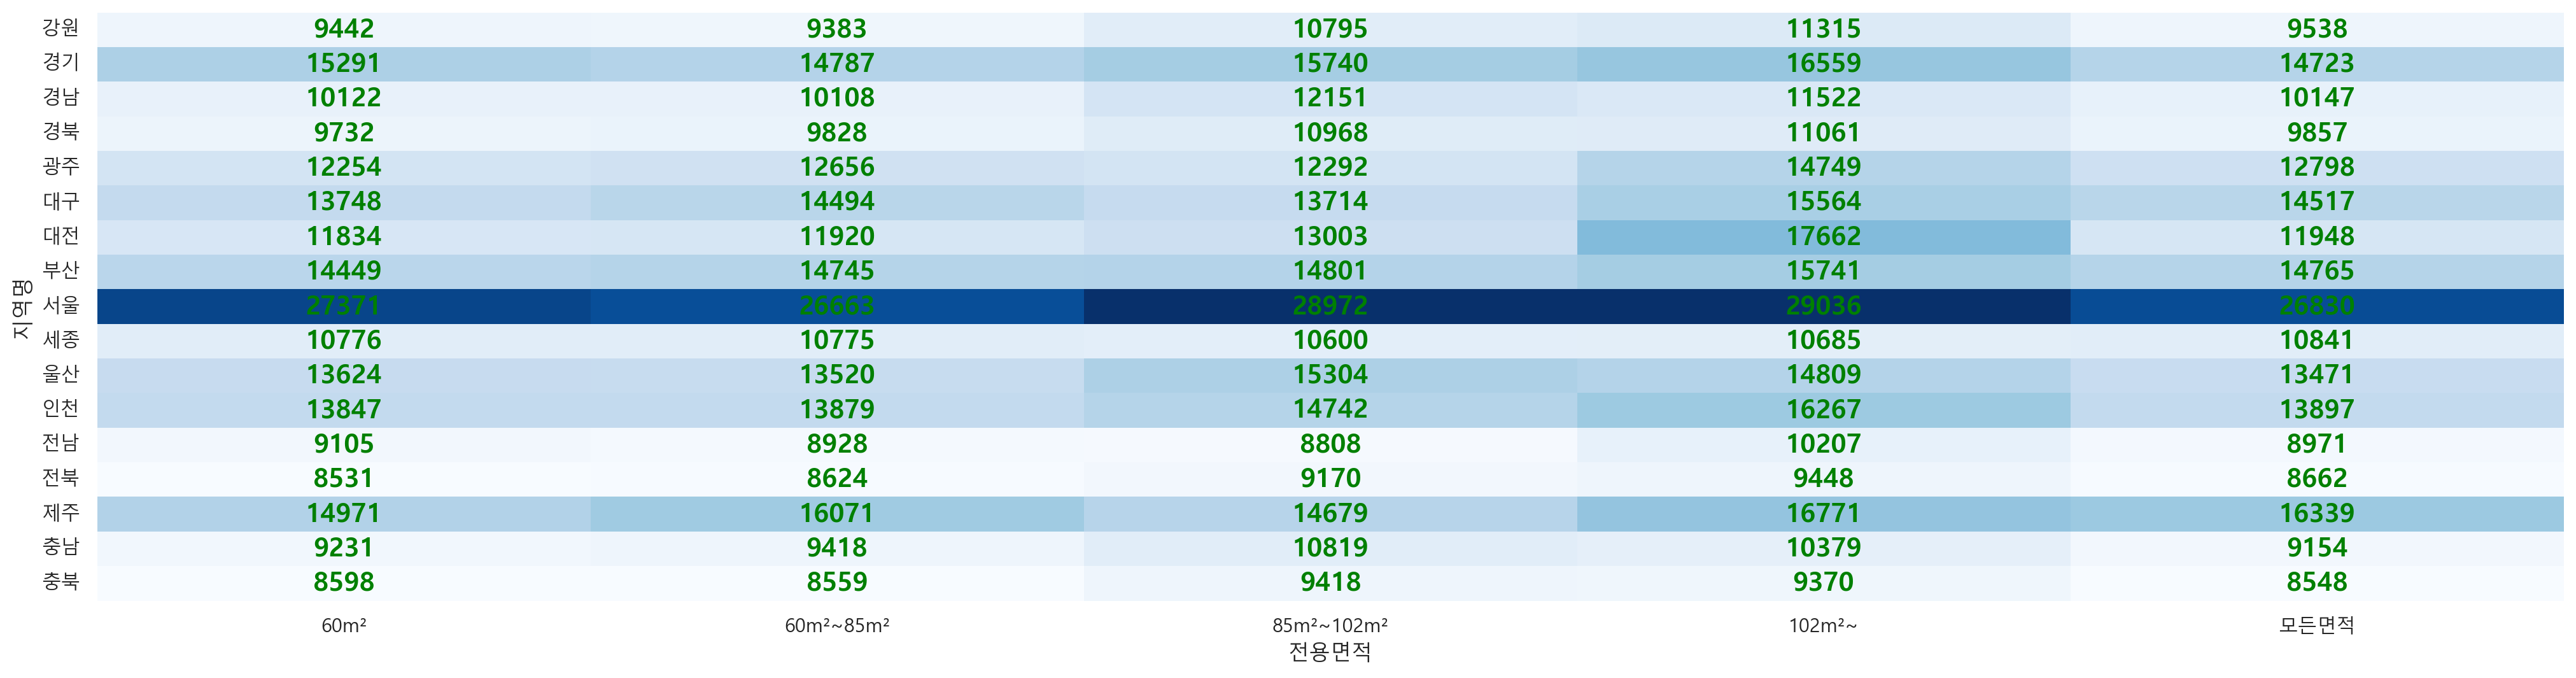

In [98]:
plt.figure(figsize=(25,6))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'color':'green', 'size':15, 'weight':'bold'}
           )
plt.show()

## (5) Ïó∞ÎèÑ, ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(ÌèâÍ∑†)

In [101]:
df_last.groupby(['Ïó∞ÎèÑ', 'ÏßÄÏó≠Î™Ö'])['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean().unstack()

ÏßÄÏó≠Î™Ö             Í∞ïÏõê         Í≤ΩÍ∏∞            Í≤ΩÎÇ®            Í≤ΩÎ∂Å            Í¥ëÏ£º  \
Ïó∞ÎèÑ                                                                        
2015   7188.060000  11060.940   8459.220000   7464.160000   7916.700000   
2016   7162.903846  11684.970   8496.730000   7753.405000   9190.683333   
2017   7318.850000  12296.185   8806.600000   8288.063793   9599.700000   
2018   8219.255000  14258.420   9327.670000   8680.776923   9526.953333   
2019   8934.475000  15665.540  10697.615789   9050.250000  12111.675000   
2020  10302.423214  15106.080  10919.272222   9997.693750  13406.485714   
2021  10291.325000  14567.080  11302.335000  11227.150000  13709.850000   
2022  11644.215000  16621.550  12455.685000  12018.050000  15095.885106   
2023  13409.385000  20175.210  13283.182759  13025.320000  17957.852830   
2024  15622.282500  21532.500  13776.571875  14085.355263  18548.408108   

ÏßÄÏó≠Î™Ö             ÎåÄÍµ¨            ÎåÄÏ†Ñ            Î∂ÄÏÇ∞            ÏÑúÏö∏            ÏÑ∏Ï¢Ö  \
Ïó∞ÎèÑ                                                                           
2015   9018.900000   8190.600000  10377.400000  20315.680000   8765.020000   
2016  10282.030000   8910.733333  10743.535000  21753.435000   8857.805000   
2017  12191.972222   9912.910526  11637.615000  21864.095000   9132.945763   
2018  12139.252632  10234.106667  12889.965000  23202.245000  10340.463158   
2019  14081.650000  12619.200000  13537.865000  28286.830000  11299.394118   
2020  15314.200000  11238.844737  13353.010000  29781.015000  11628.100000   
2021  15586.285000  11994.216667  14317.655000  29380.450000  12578.060000   
2022  16821.915000  14113.880000  18166.835593  29128.531034  11309.971698   
2023  17656.747059  17917.288889  20470.850847  33230.560000  12278.200000   
2024  24102.283333  19881.922500  22900.267500  38981.827500  19115.800000   

ÏßÄÏó≠Î™Ö             Ïö∏ÏÇ∞            Ïù∏Ï≤ú            Ï†ÑÎÇ®            Ï†ÑÎ∂Å            Ï†úÏ£º  \
Ïó∞ÎèÑ                                                                           
2015   9367.600000  10976.020000   6798.880000   7110.400000   7951.075000   
2016   9582.574138  11099.055000   6936.600000   6906.625000   9567.480000   
2017  10630.160870  11672.430000   7413.230000   7406.126316  12628.539623   
2018  10241.400000  11881.532143   7929.845000   8174.595000  11935.968000   
2019  10216.250000  13249.775000   8219.275862   8532.260000  11828.469231   
2020  12837.600000  14982.990000   9562.398214   8559.430000  14192.876923   
2021  14191.953061  15774.330000   9980.760000   9047.928814  22302.342857   
2022  17903.751724  17341.830000  10635.508475  10003.070000  18953.825000   
2023  18832.093220  16150.695000  11846.682692  10966.024528  24095.901923   
2024  17828.765625  21506.347500  13540.415625  12400.941667  25096.087500   

ÏßÄÏó≠Î™Ö             Ï∂©ÎÇ®            Ï∂©Î∂Å  
Ïó∞ÎèÑ                                
2015   7689.880000   6828.800000  
2016   7958.225000   7133.335000  
2017   8157.315517   7462.565000  
2018   8201.820000   8149.295000  
2019   8748.840000   7970.875000  
2020   9139.380000   8358.956897  
2021   9860.741379   8822.385000  
2022  11730.345000  10033.540000  
2023  12580.590000  11103.950000  
2024  12739.650000  12851.767500

In [105]:
df_last.pivot_table(index=['Ïó∞ÎèÑ','ÏßÄÏó≠Î™Ö'],
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©').unstack()
r = df_last.pivot_table(index='Ïó∞ÎèÑ',
                   columns='ÏßÄÏó≠Î™Ö',
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©')

In [109]:
r.loc[2024].head(1)

ÏßÄÏó≠Î™Ö
Í∞ïÏõê    15622.2825
Name: 2024, dtype: float64

In [111]:
r['Ï†úÏ£º'].head(1)

Ïó∞ÎèÑ
2015    7951.075
Name: Ï†úÏ£º, dtype: float64

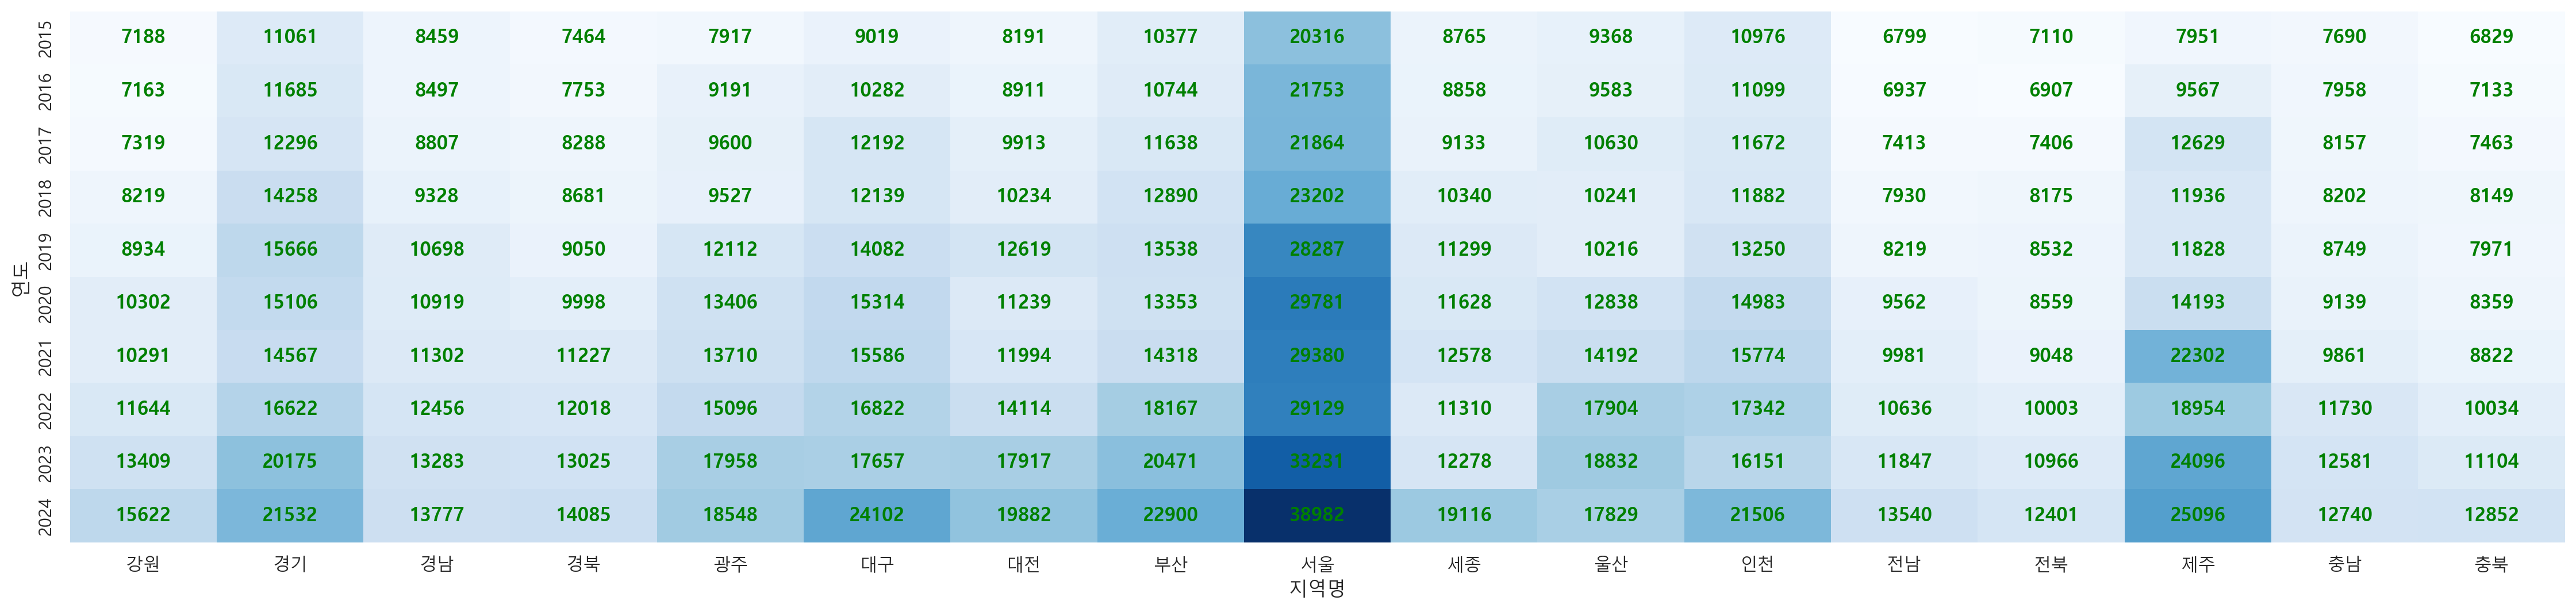

In [115]:
plt.figure(figsize=(28,6))
sns.heatmap(r, annot=True, fmt='.0f', cmap='Blues',
           annot_kws={'weight':'bold', 'color':'green'}, cbar=False)
plt.show()

- color map Ï∞∏Ï°∞ : https://matplotlib.org/stable/users/explain/colors/colormaps.html (21page)
- ÏÉâÏÉÅÏù¥ÎÇò style Ï∞∏Ï°∞ : https://wikidocs.net/92085 (14page)

# 8. matplotlibÏúºÎ°ú ÏãúÍ∞ÅÌôî(ÏúÑÏùò ÎèÑÌëú)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) ÏßÄÏó≠Î≥Ñ Í≤∞Ï∏°ÏπòÎ•º Ï†úÏô∏Ìïú Îç∞Ïù¥ÌÑ∞Ïàò(line, bar)

In [61]:
result = df_last.groupby('ÏßÄÏó≠Î™Ö')['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].count().sort_values()
result.min(), result.max()

(395, 535)

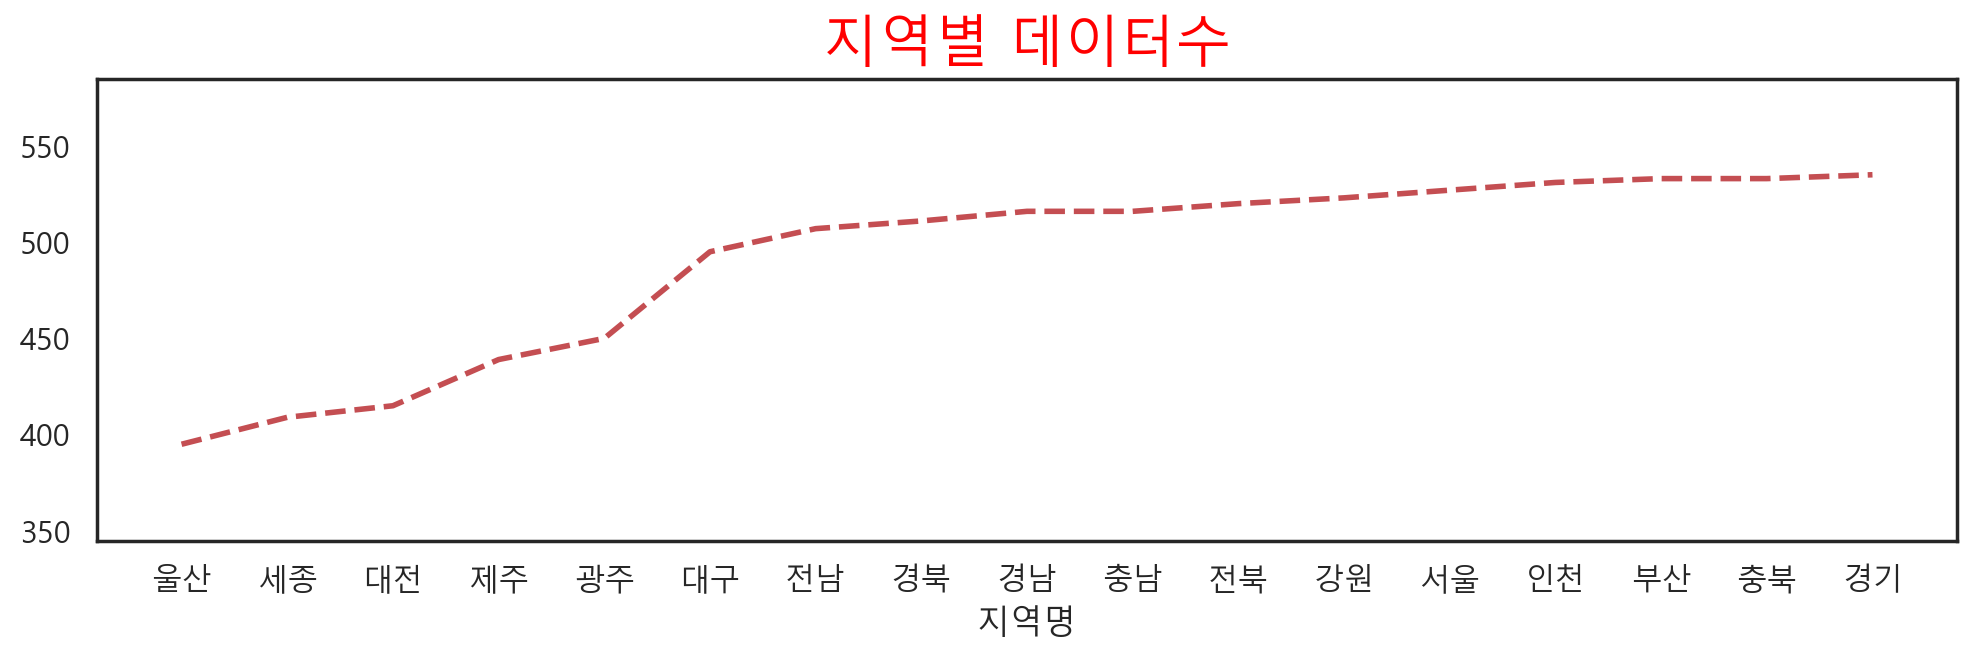

In [62]:
# result.plot.line()
ax = result.plot(kind='line', color='r', linestyle='--', linewidth=2,
           # title='ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò'
           # ylim =[result.min()-50, result.max()+50]
)

#plt.title('ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞Ïàò', size=20, color='red')
ax.set_title('ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞Ïàò', size=20, color='red')
ax.set_ylim([result.min()-50, result.max()+50])
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

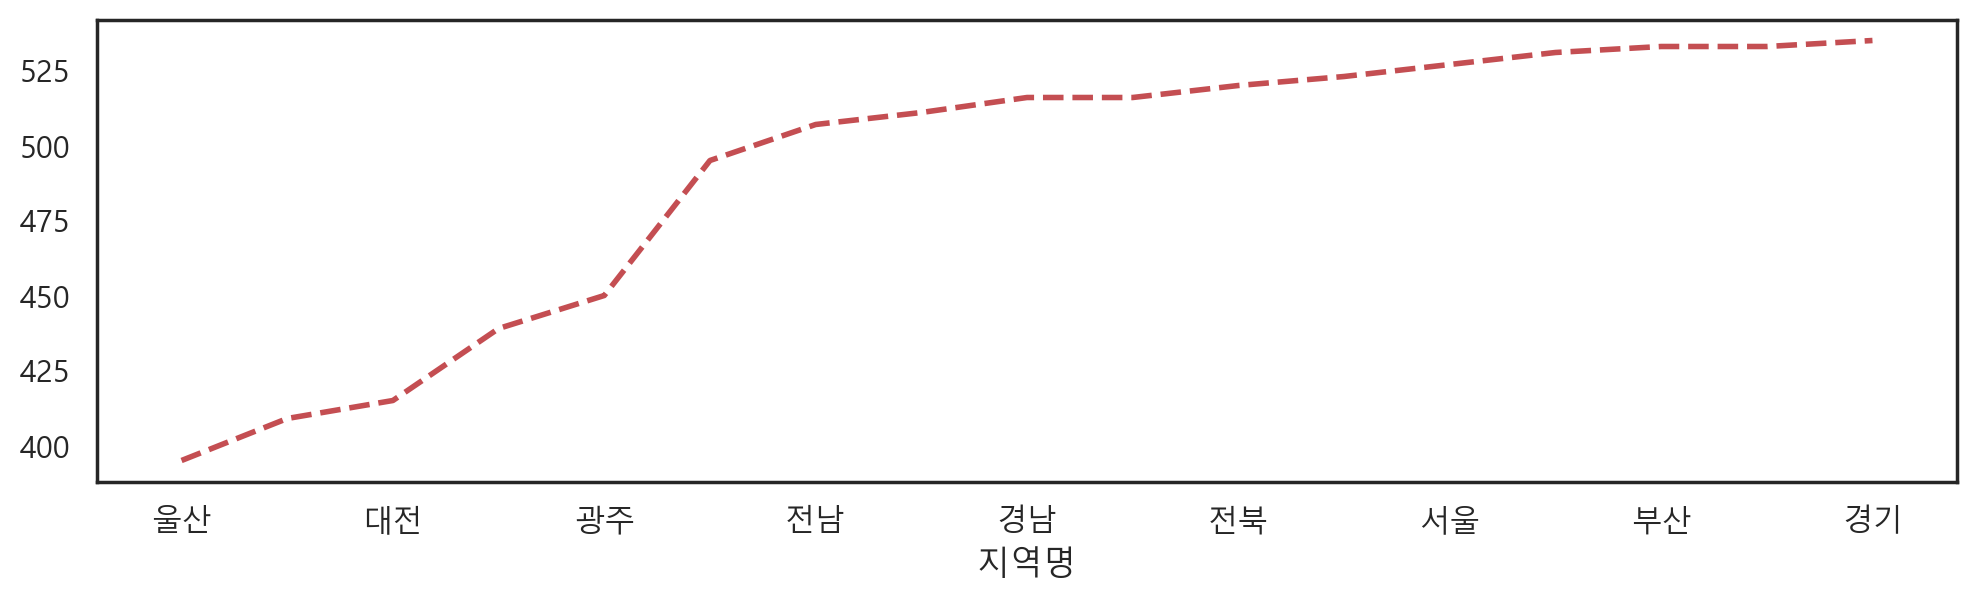

In [65]:
ax = result.plot(kind='line', color='r', linestyle='--', linewidth=2,
           # title='ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò'
           # ylim =[result.min()-50, result.max()+50]
)


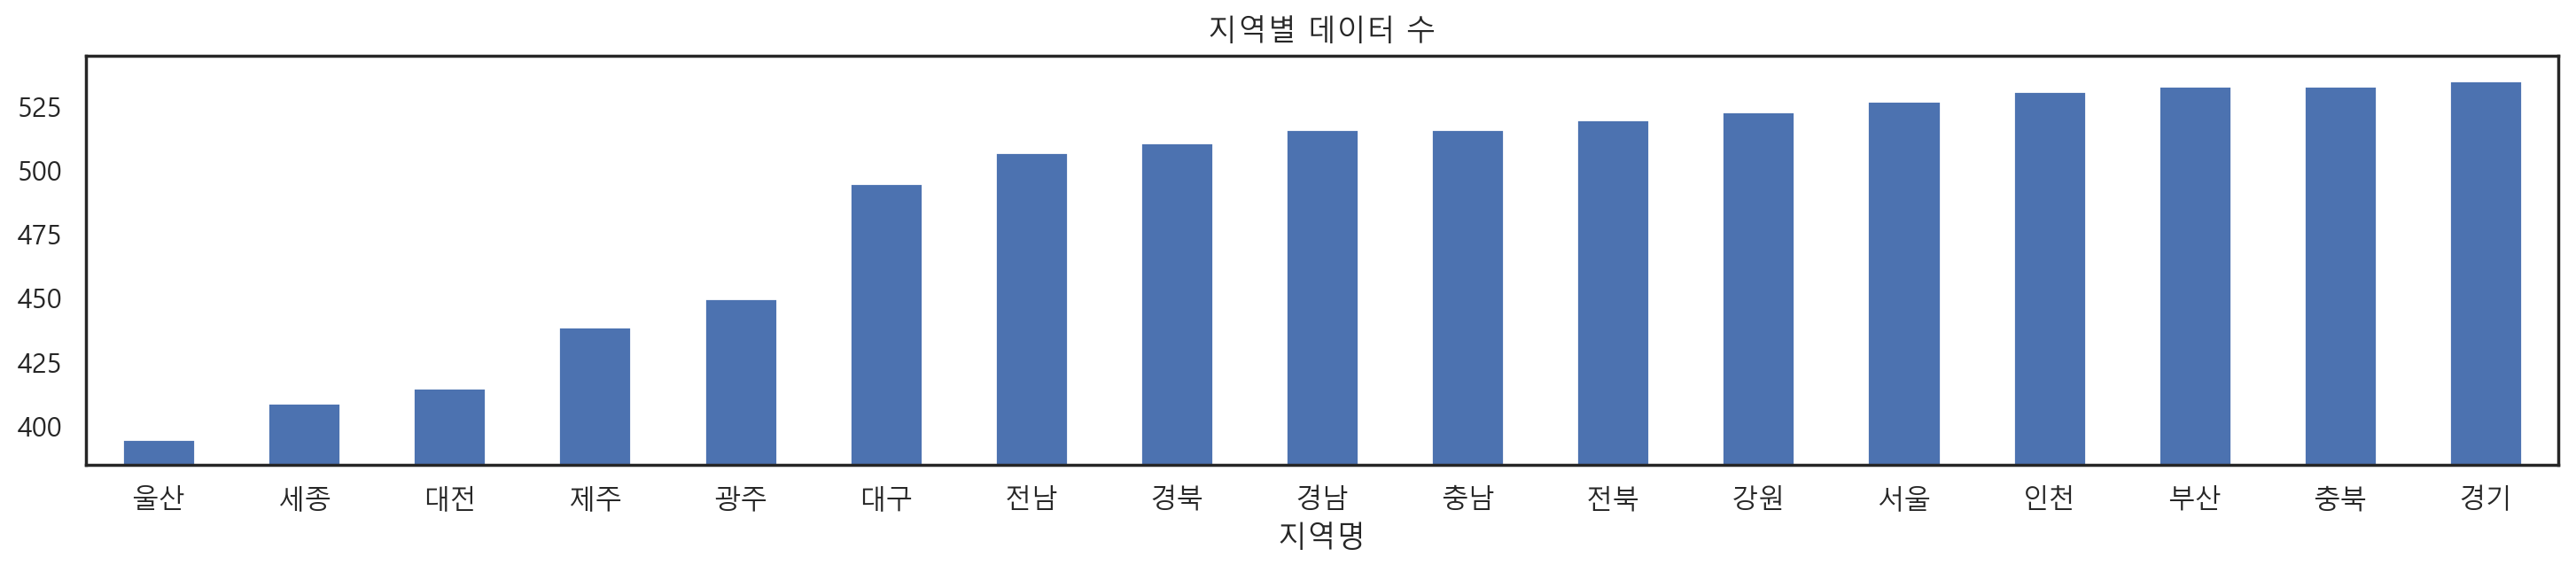

In [152]:
result.plot(kind='bar', rot=0, figsize=(18, 3),
           title='ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò',
           #ylim = [result.min()+50, result.max()+50]
           )
plt.ylim([result.min()-10, result.max()+10])
plt.show()

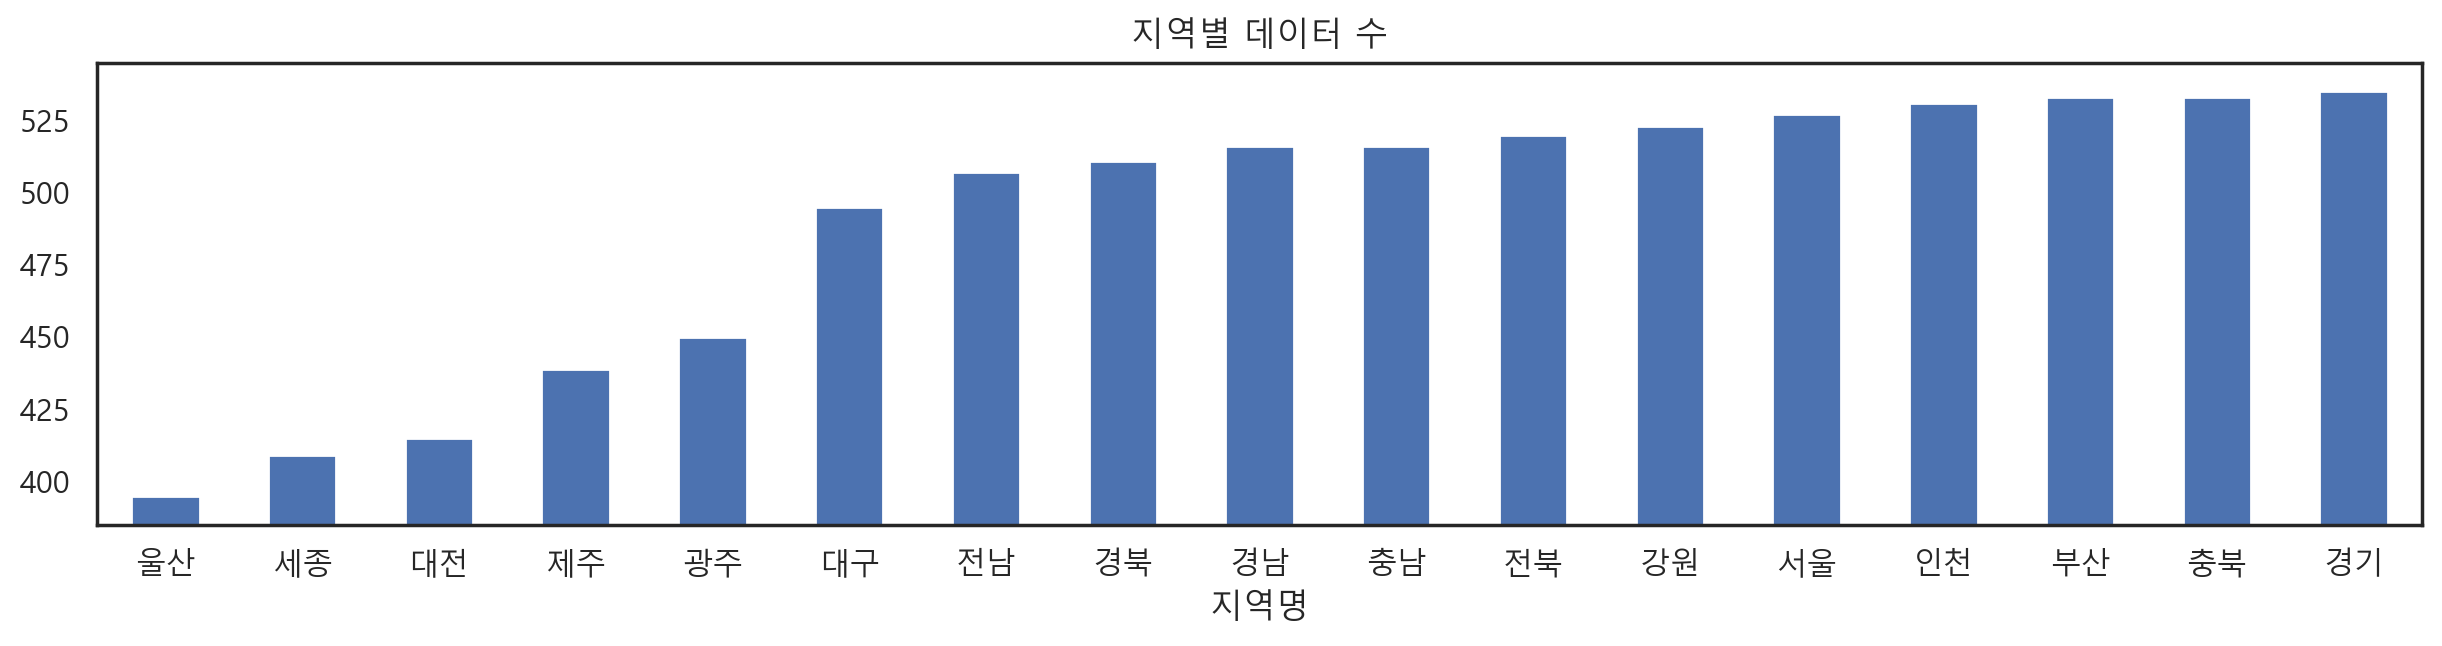

In [70]:
result.plot(kind='bar', rot = 0, figsize=(15,3),
           title='ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò')


plt.ylim([result.min()-10, result.max()+10])
plt.show()

## (2) ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© (line, bar)

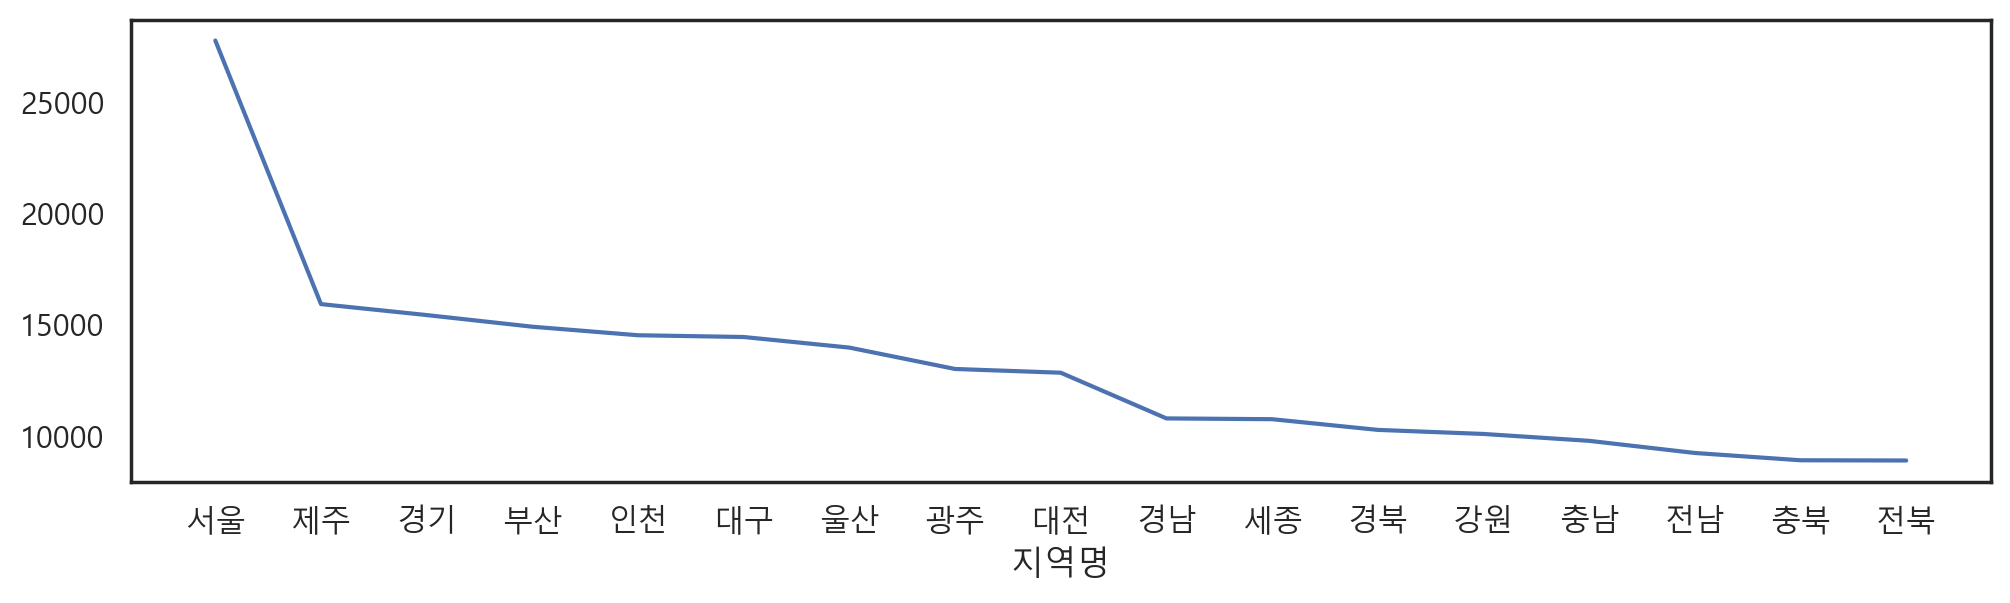

In [71]:
result = df_last.groupby('ÏßÄÏó≠Î™Ö')['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean().sort_values(
    ascending=False
)
ax = result.plot(kind='line')
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result.index)
plt.show()

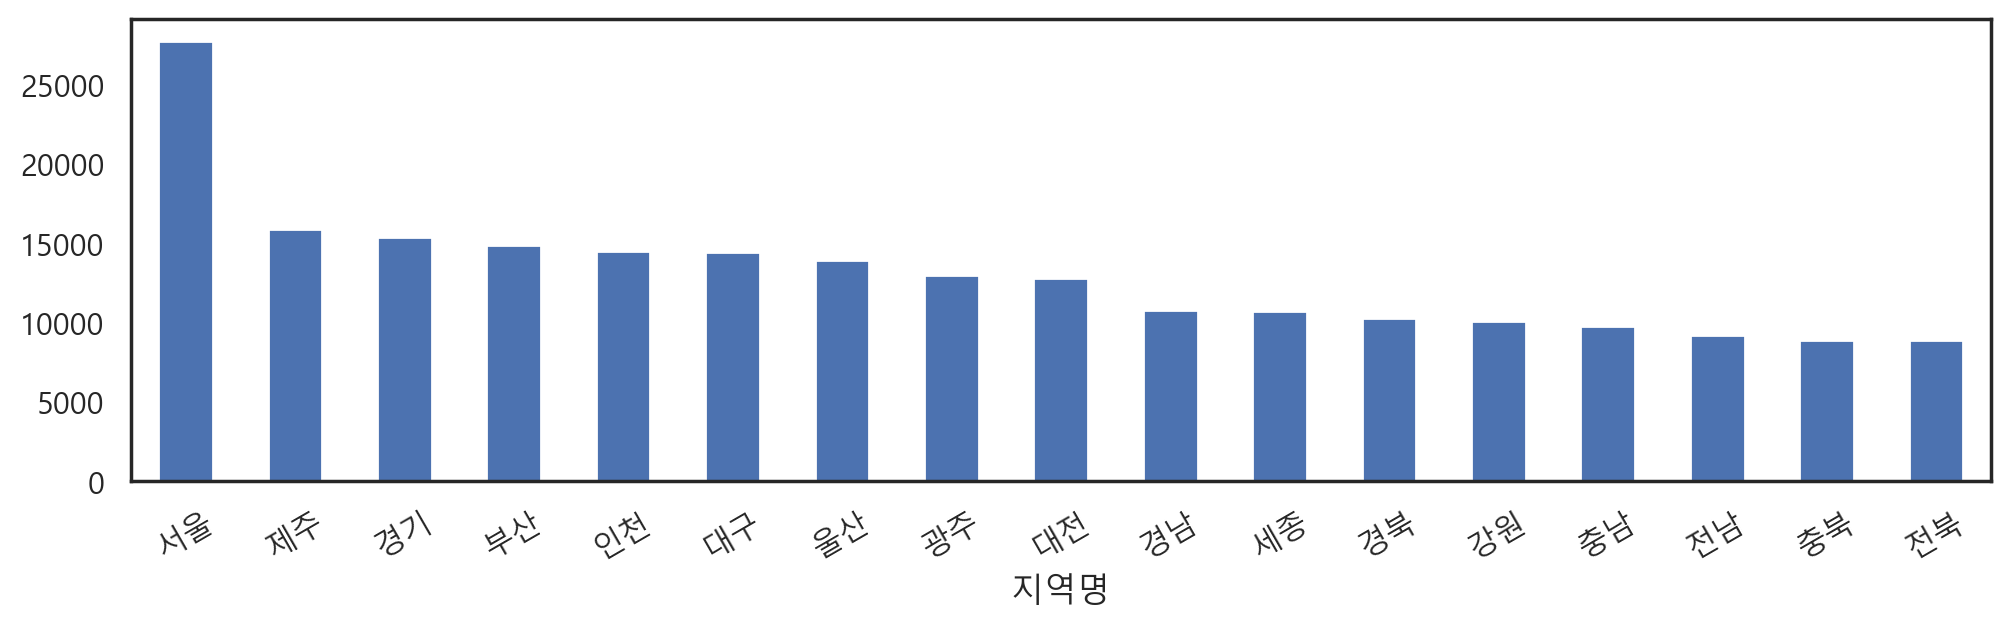

In [162]:
result.plot(kind='bar', rot=30)
plt.show()

## (3) Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(barplot)

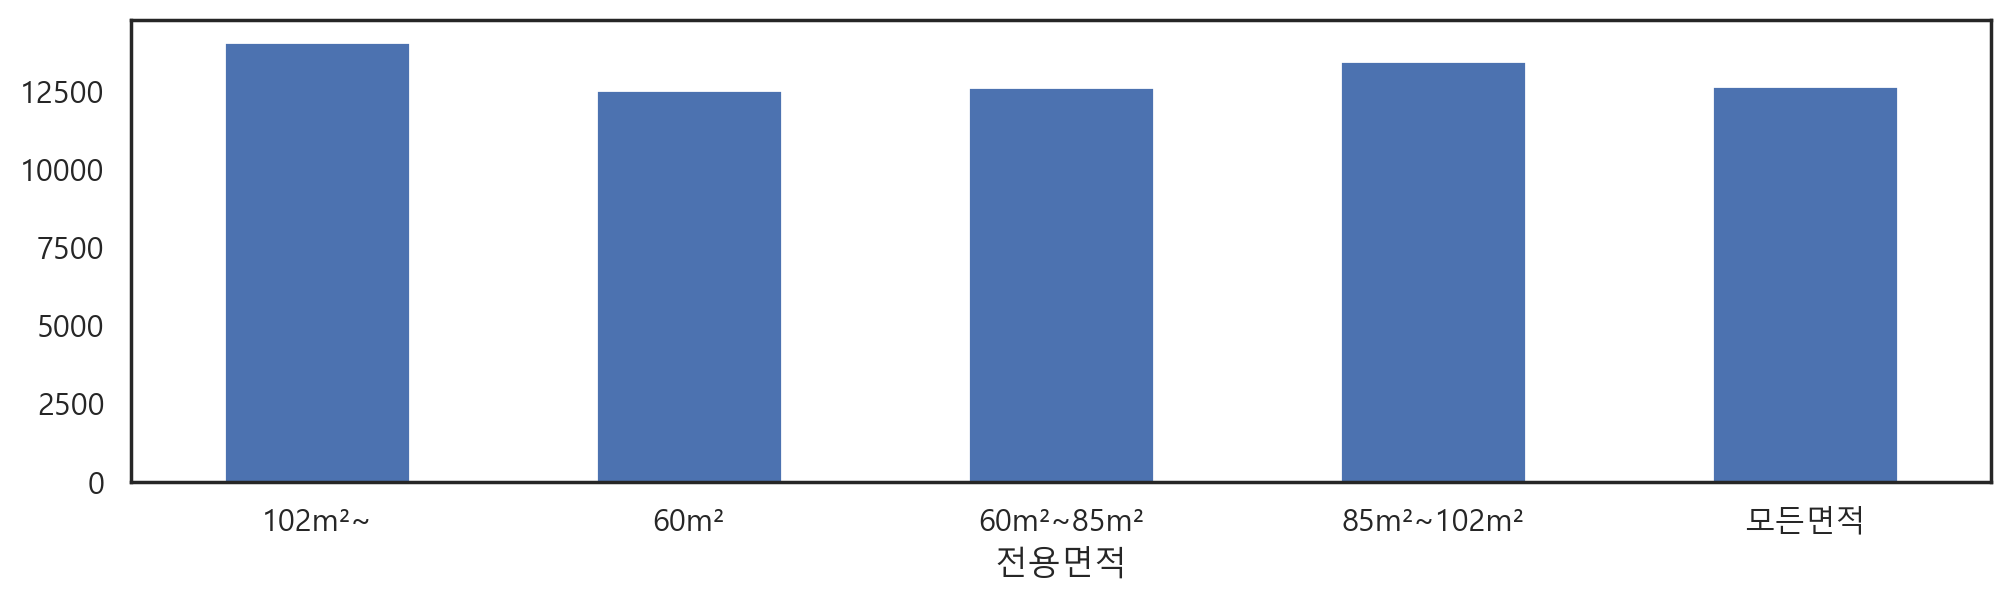

In [164]:
result = df_last.groupby('Ï†ÑÏö©Î©¥Ï†Å')['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean()
result.plot(kind='bar', rot=0)
plt.show()

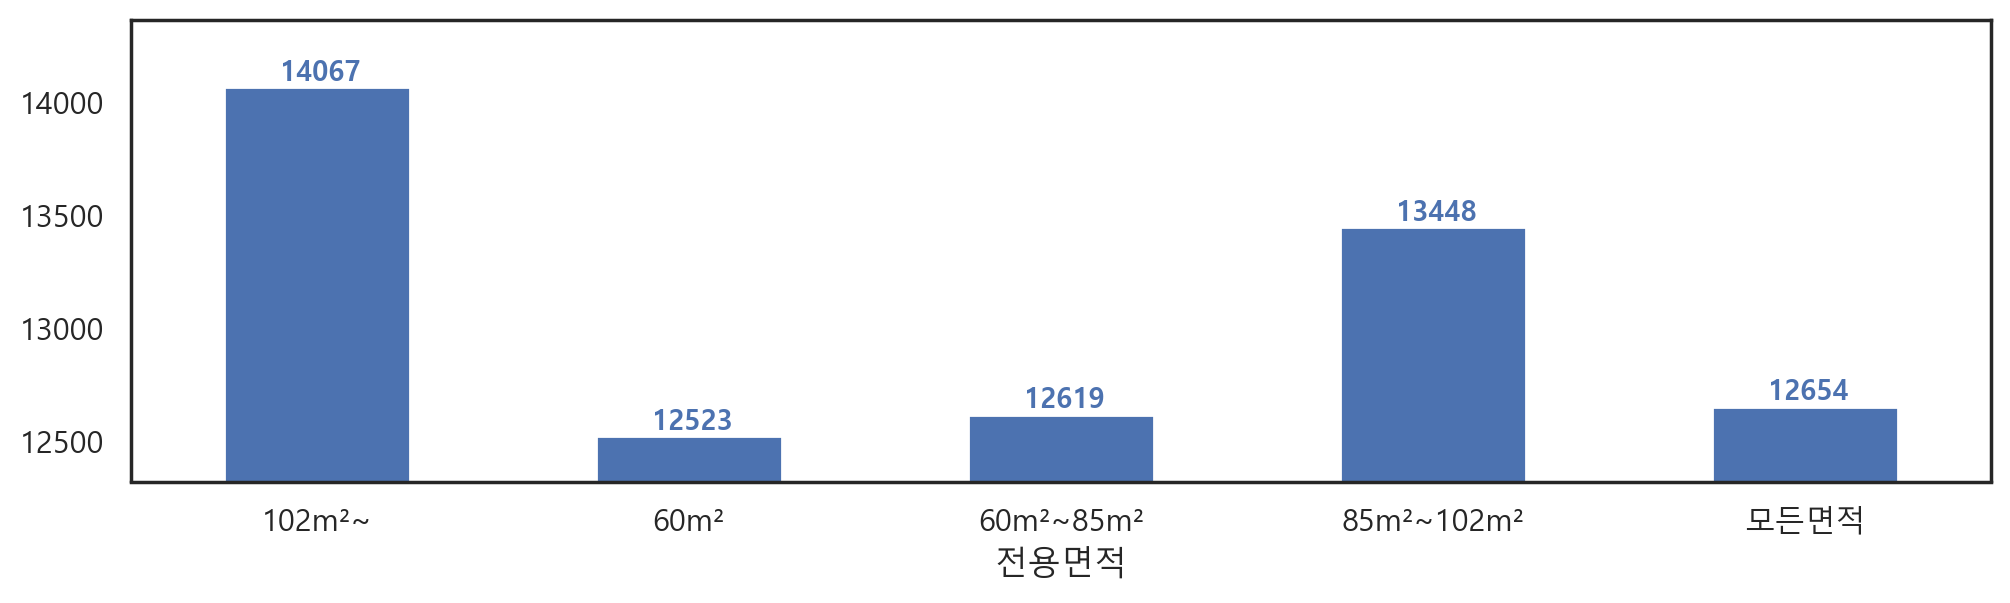

In [191]:
result.plot(kind='bar',
           rot=0,
           ylim = [result.min()-200, result.max()+300])
# plt.text(0-0.1, 14066+30, 14066)
# plt.text(1-0.1, 12522+30, 12522)
for i, val in enumerate(result):
    plt.text(i-0.1, val+30, round(val), color='b', fontsize=10, weight='bold')
plt.show()

In [170]:
for i, val in enumerate(result):
    print(i, val)

0 14066.826845637583
1 12522.77442680776
2 12619.048826815642
3 13447.67283519553
4 12654.06809815951


## (4) Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(line, bar)

In [197]:
result = df_last.groupby('Ïó∞ÎèÑ')['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean()
print('result :', result)
print('xÏ∂ï :', result.index)
print('yÏ∂ï :', [round(r,1) for r in result])

result : Ïó∞ÎèÑ
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16890.920657
2024    18962.919231
Name: ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©, dtype: float64
xÏ∂ï : Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int64', name='Ïó∞ÎèÑ')
yÏ∂ï : [9202.7, 9683.0, 10372.9, 10978.9, 12188.3, 13039.4, 13636.0, 14942.5, 16890.9, 18962.9]


In [200]:
for key, val in result.items():
    print(key, val)

2015 9202.735802469135
2016 9683.025
2017 10372.928923076923
2018 10978.938411316649
2019 12188.293092105265
2020 13039.42244897959
2021 13636.02253968254
2022 14942.504494382023
2023 16890.92065677966
2024 18962.919230769232


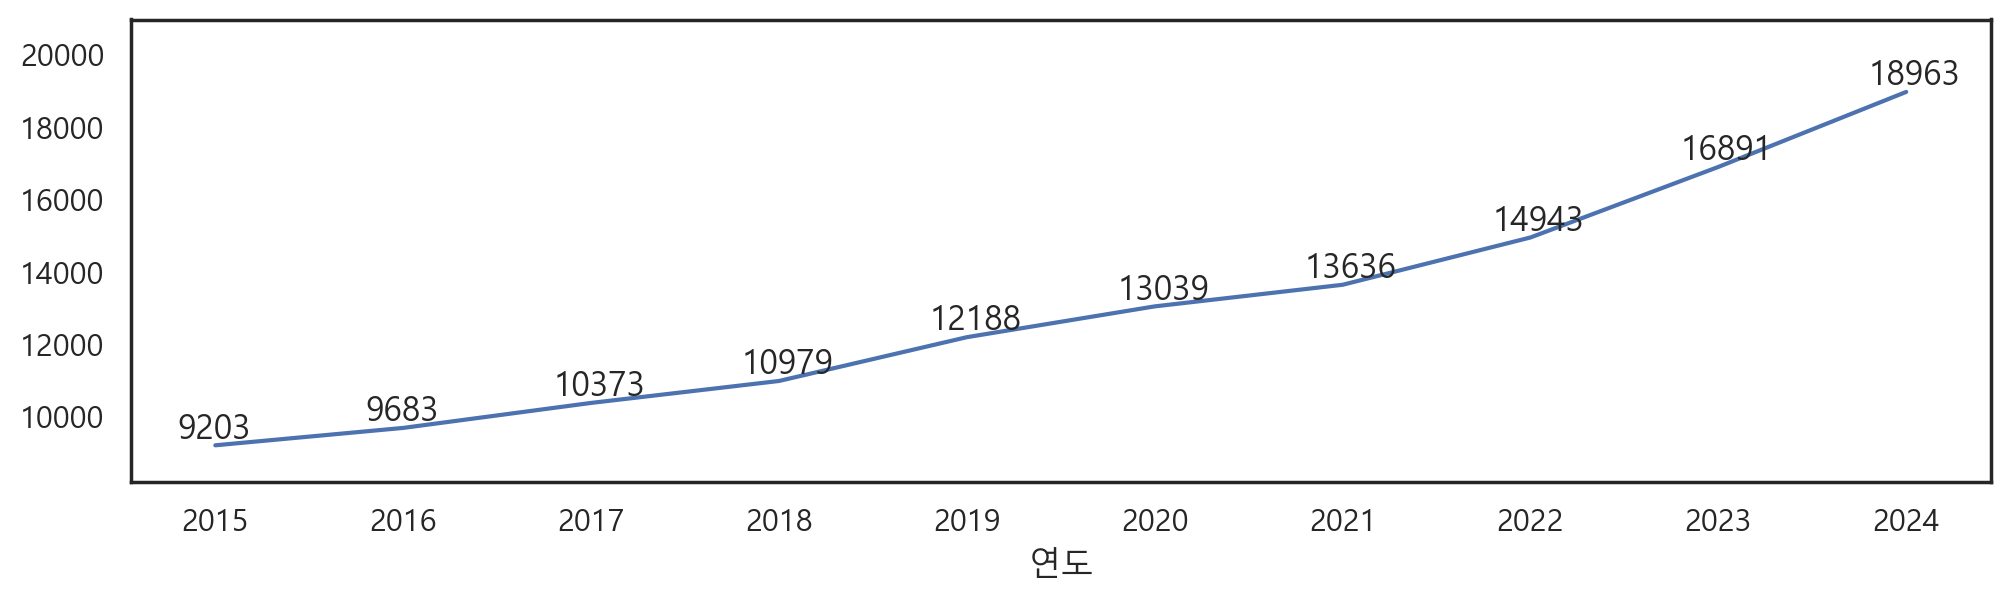

In [208]:
result.plot(kind='line',
           xticks=range(2015, 2025),
           ylim = [result.min()-1000, result.max()+2000])
#plt.text(2015, 15000, 'ÏÉòÌîå')
for year, val in result.items():
    plt.text(year-0.2, val+200, round(val))

Î≤îÎ°Ä:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

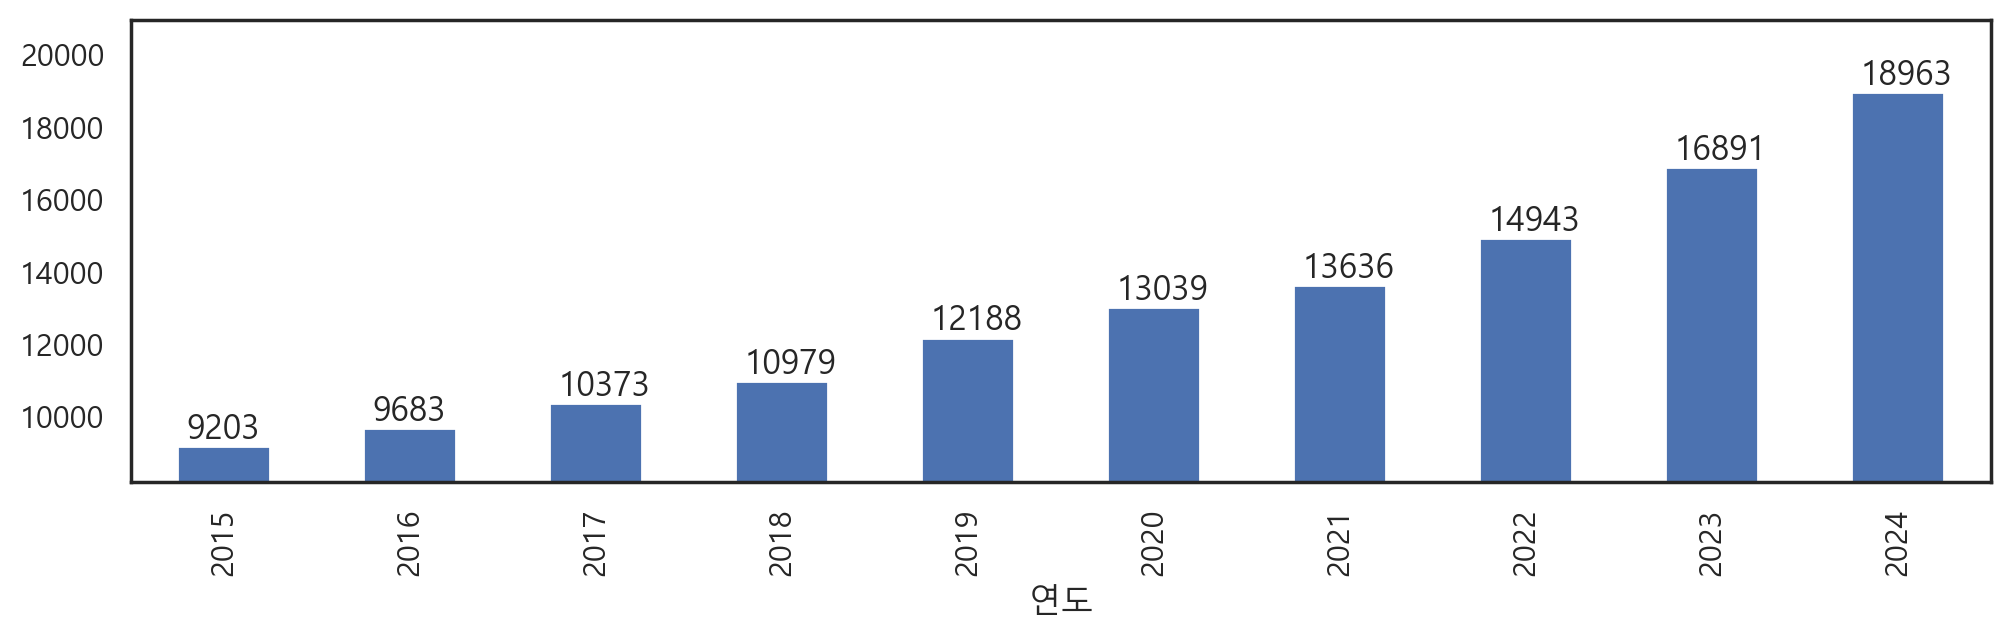

In [212]:
result.plot(kind='bar',
           ylim = [result.min()-1000, result.max()+2000])
#plt.text(2015, 15000, 'ÏÉòÌîå')
for i, val in enumerate(result):
     plt.text(i-0.2, val+200, round(val))

In [214]:
# Ïó∞ÎèÑÏôÄ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
df_last[['Ïó∞ÎèÑ','ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©']].corr()

Ïó∞ÎèÑ    ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©
Ïó∞ÎèÑ      1.000000  0.472675
ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©  0.472675  1.000000

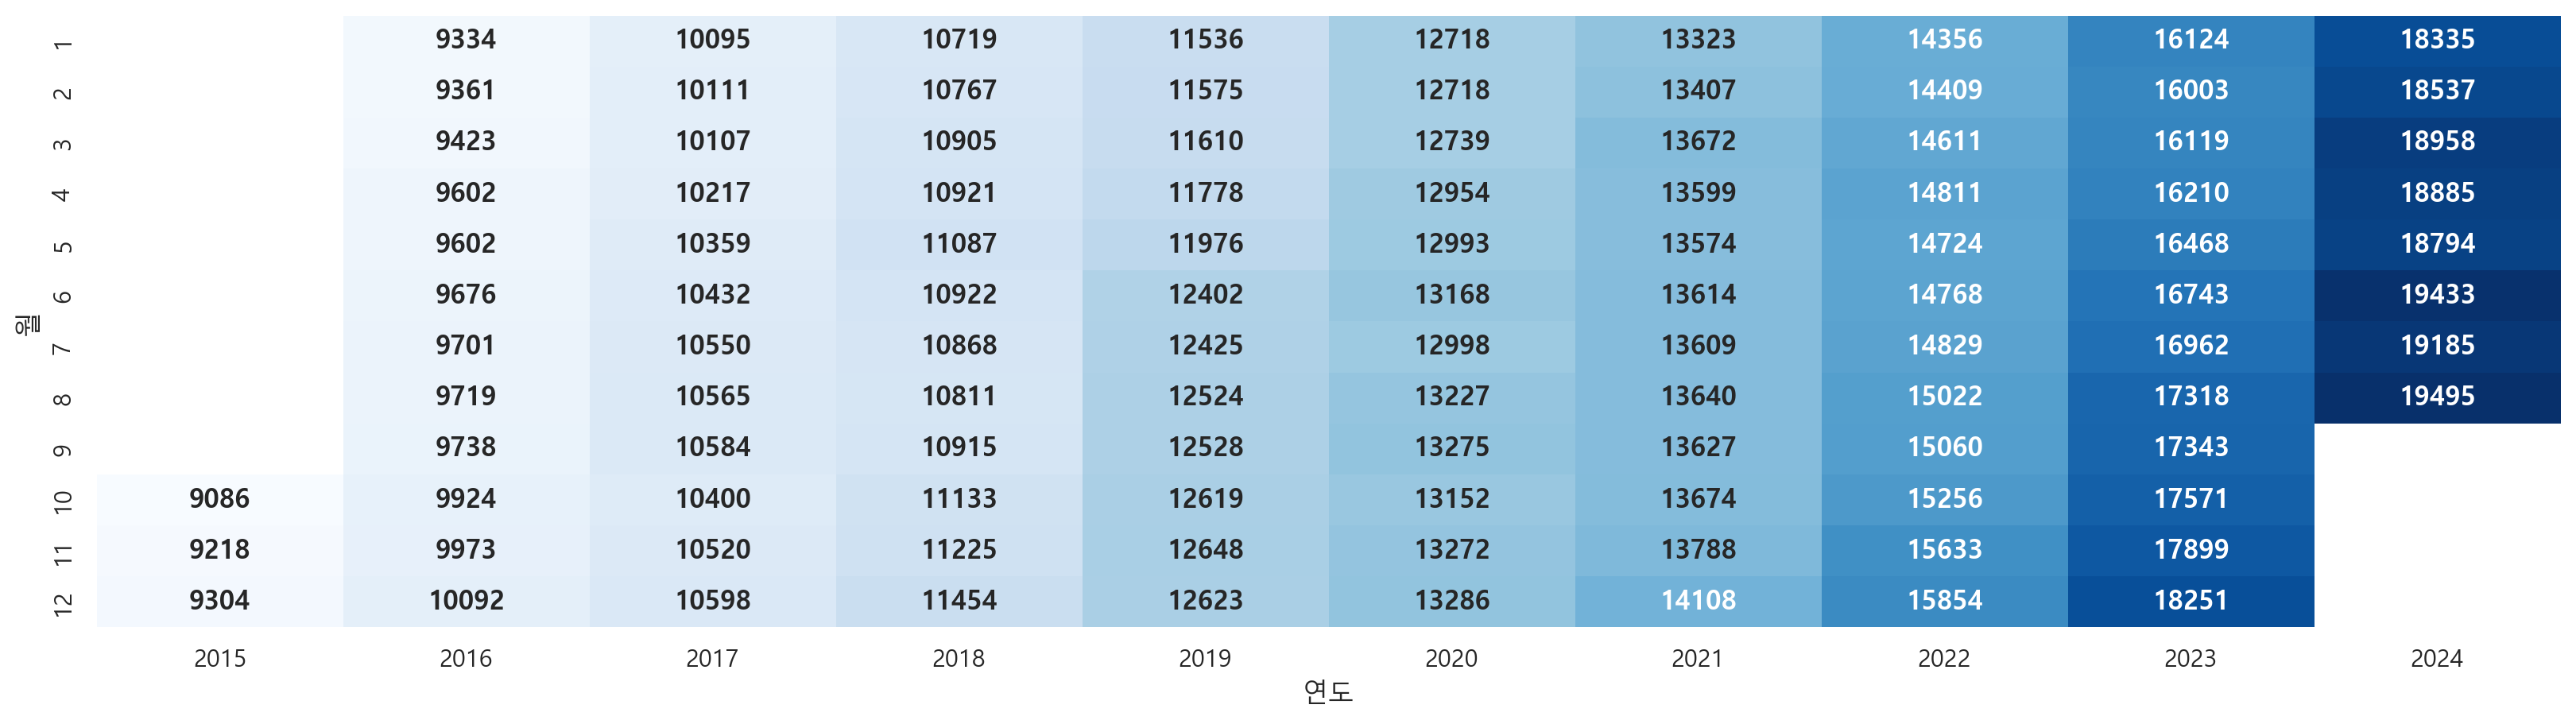

In [227]:
df_last.groupby(['Ïõî','Ïó∞ÎèÑ'])['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean().unstack()
r = df_last.pivot_table(index='Ïõî',
                   columns='Ïó∞ÎèÑ',
                   values='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©')
plt.figure(figsize=(20,5))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', cbar=False,
           annot_kws={'weight':'bold', 'size':12}
           )
plt.show()

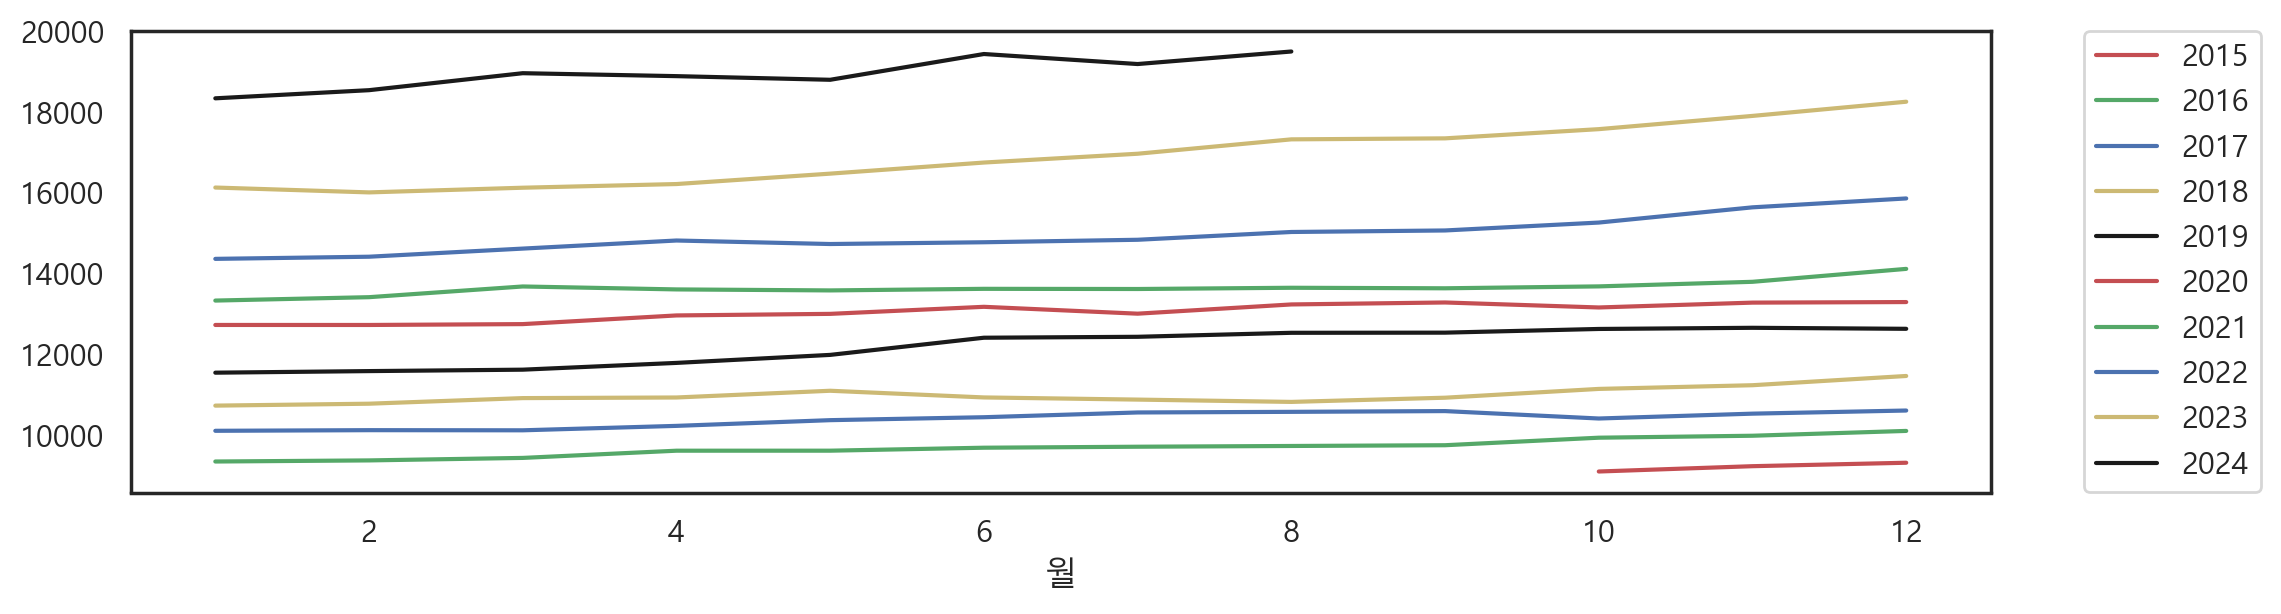

In [233]:
r.plot(#kind='line'
    color=['r','g','b','y','k']
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

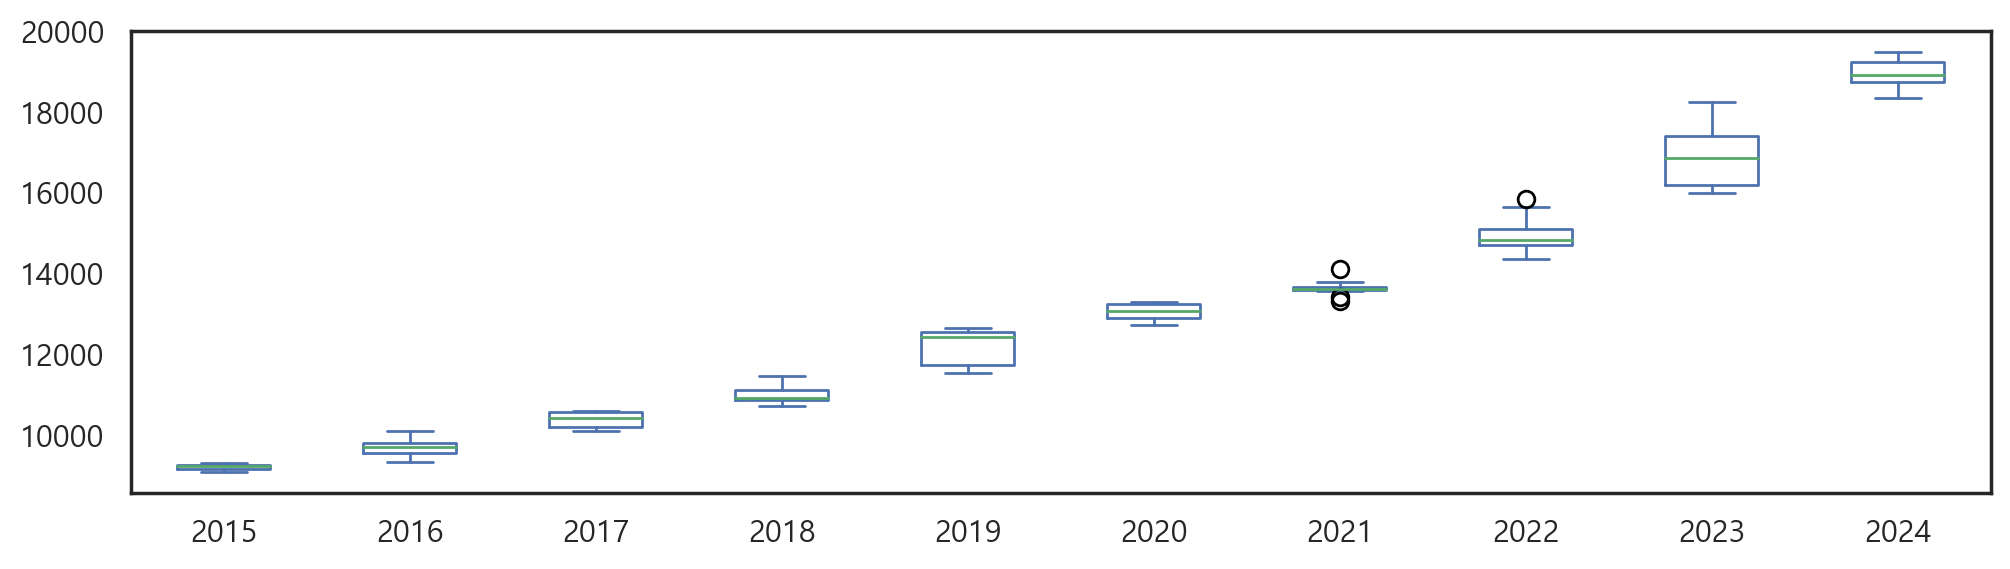

In [235]:
r.plot(kind='box')
plt.show()

# 9. seabornÏúºÎ°ú ÏãúÍ∞ÅÌôî
- ÏúÑÏóêÏÑú ÏãúÍ∞ÅÌôîÌïú ÎÇ¥Ïö©ÏùÑ seabornÏúºÎ°ú ÏãúÍ∞ÅÌôî

## (1) ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©

<Axes: xlabel='ÏßÄÏó≠Î™Ö', ylabel='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'>

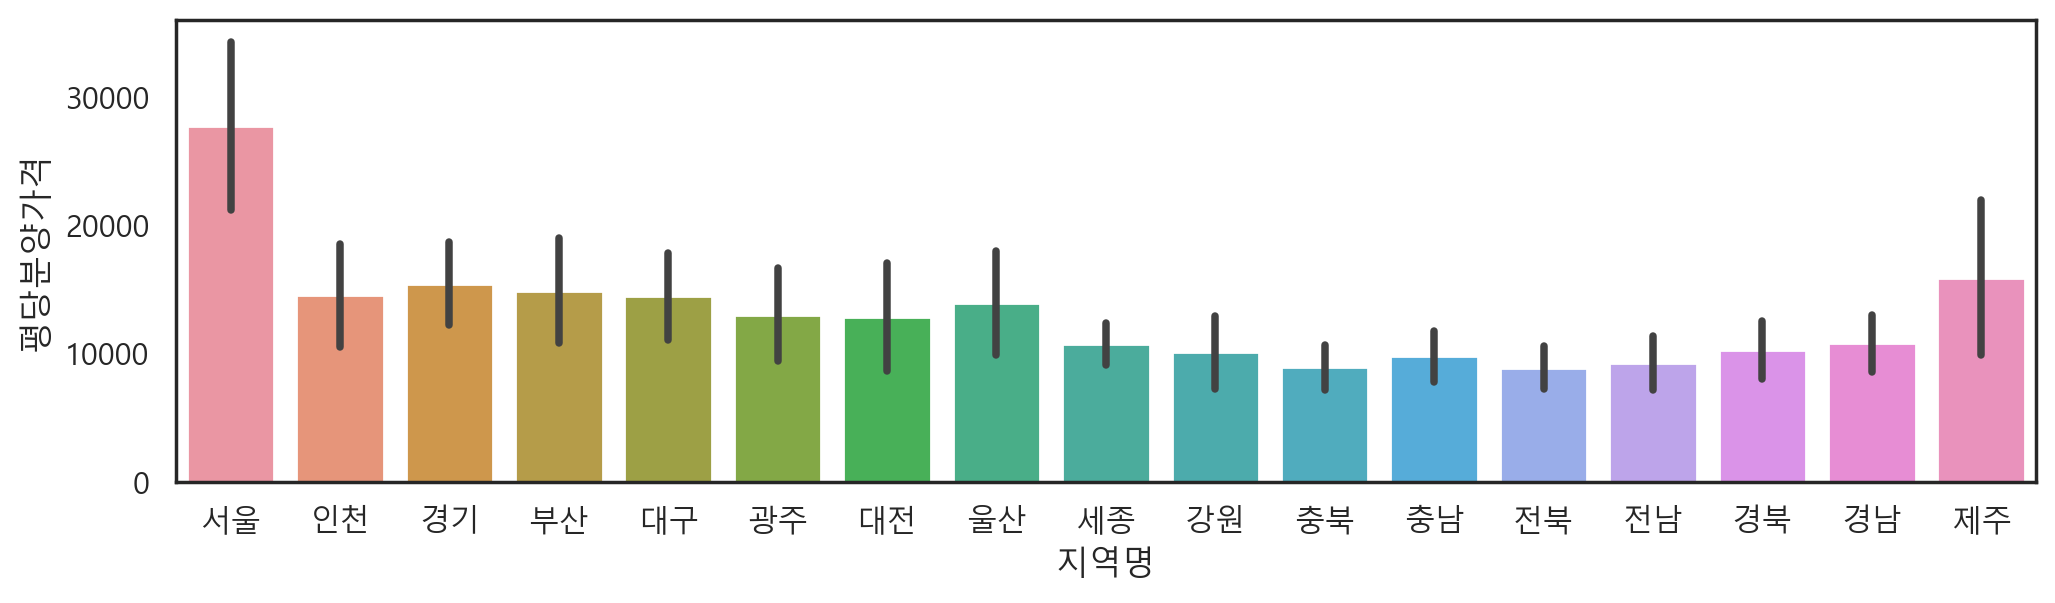

In [239]:
sns.barplot(data=df_last, x='ÏßÄÏó≠Î™Ö', y='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©',
           # errorbar=None
           # errorbar=('ci',95) # Í∏∞Î≥∏Í∞í(95% Ïã†Î¢∞Íµ¨Í∞ÑÏùò ÌèâÍ∑†)
            errorbar='sd' # Ïã§Ï†úÍ∞íÍ≥º ÌëúÏ§ÄÌé∏Ï∞®
           )
plt.show()

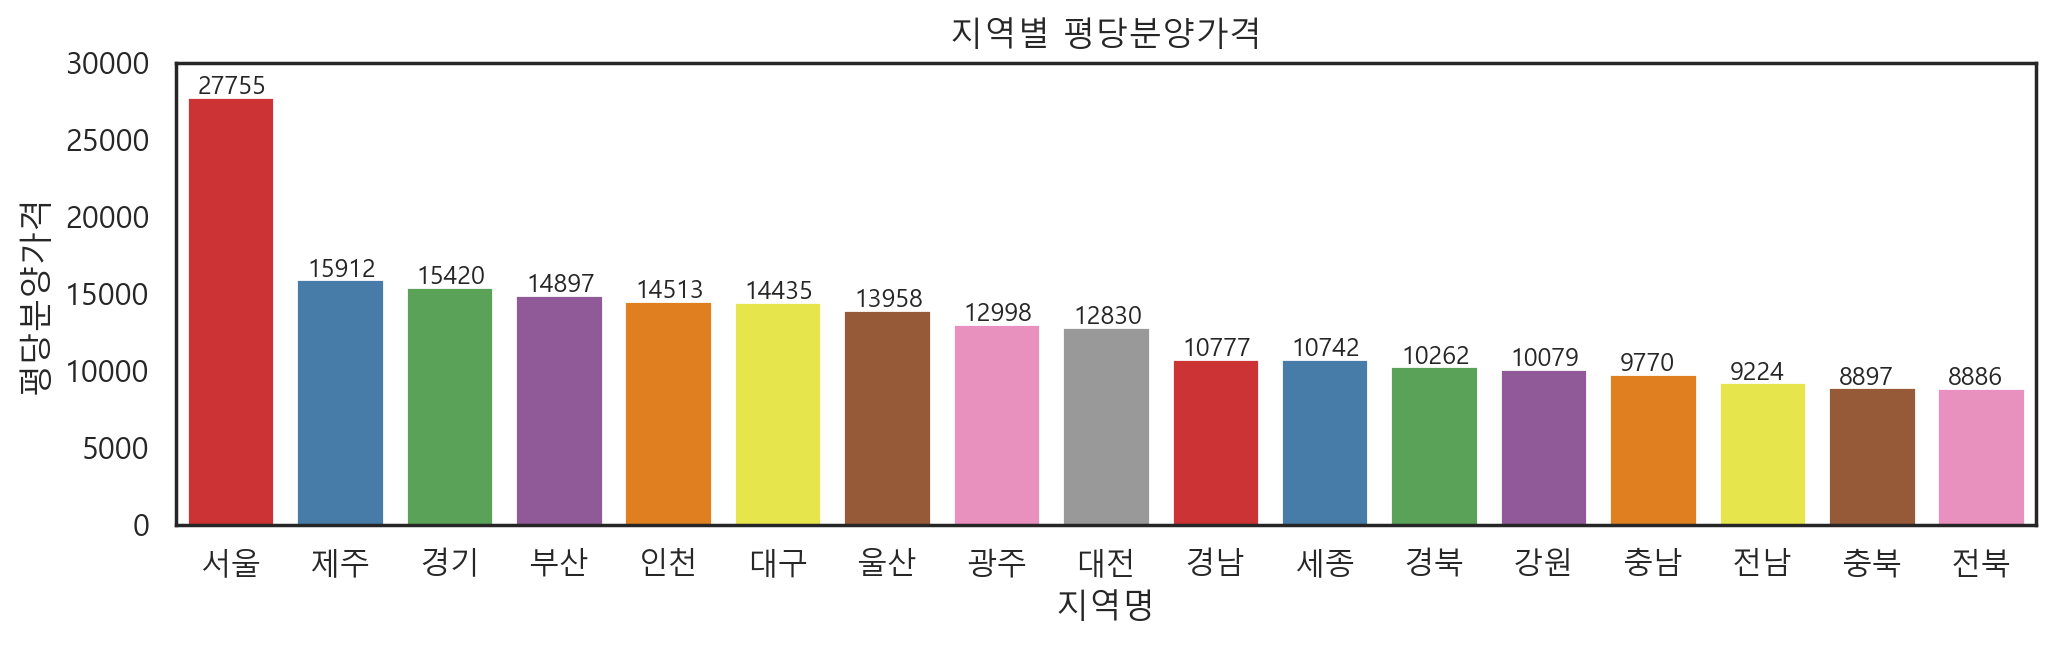

In [263]:
# Ï†ïÎ†¨Îêú ÏàúÏÑúÎ°ú ÏãúÍ∞ÅÌôî
result = df_last.groupby('ÏßÄÏó≠Î™Ö')['ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©'].mean().sort_values(
                                                    ascending=False)
ax = sns.barplot(data=df_last, x='ÏßÄÏó≠Î™Ö', y='ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©',
           errorbar=None,
           order = result.index,
           palette='Set1' 
           )
ax.set_title('ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©')
ax.set_ylim([0, 30000])
# plt.title('ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©')
for i, val in enumerate(result):
    ax.text(i-0.3, val+200, round(val), fontsize=9)
plt.show()

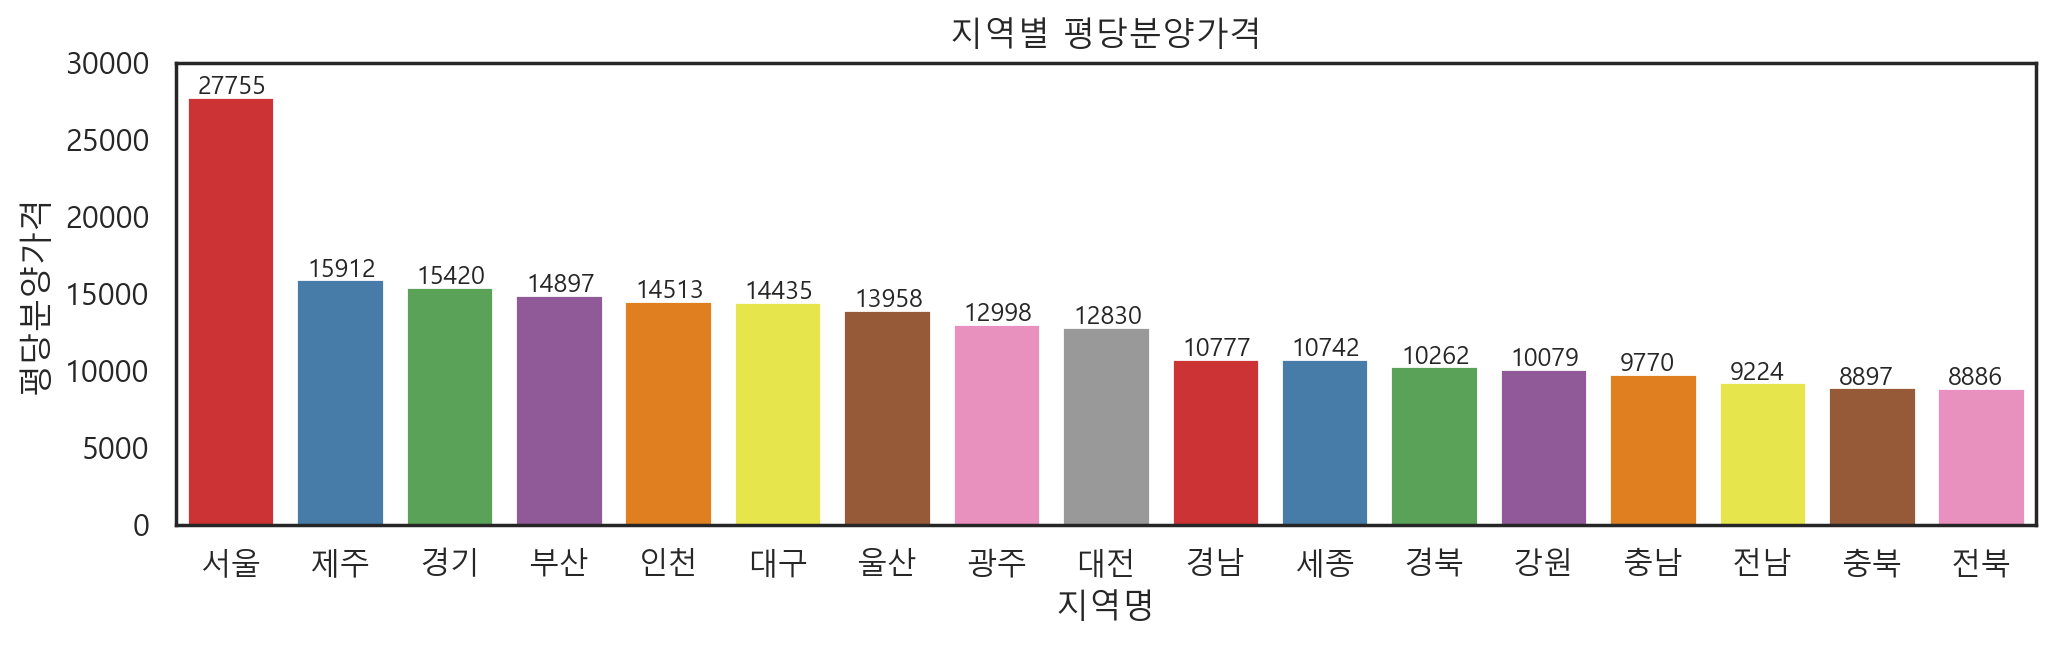

In [264]:
ax = sns.barplot(x=result.index, y=result,
           errorbar=None,
           order = result.index,
           palette='Set1' 
           )
ax.set_title('ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©')
ax.set_ylim([0, 30000])
# plt.title('ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©')
for i, val in enumerate(result):
    ax.text(i-0.3, val+200, round(val), fontsize=9)
plt.show()

## (2) Ïó∞ÎèÑÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©

## (3) Í∑∏ Ïô∏ lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : Î≤îÎ°ÄÏÇ¨Ïö©(ÍµêÏïà 20page)

# 10. Íµ¨Ï°∞Í∞Ä Îã§Î•∏ df_firstÏôÄ df_lastÎ•º Ïó∞Í≤∞ ÌõÑ Î∂ÑÏÑù
## (1) concat
- new_first :df_firstÎ•º [ÏßÄÏó≠Î™Ö, Ïó∞ÎèÑ, Ïõî, ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©]ÏúºÎ°ú Î≥ÄÌôò
- new_last : df_lastÎ•º [ÏßÄÏó≠Î™Ö, Ïó∞ÎèÑ, Ïõî, ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©]ÏúºÎ°ú Î≥ÄÌôò
                (Ï†ÑÏö©Î©¥Ï†ÅÏù¥ Î™®Îì†Î©¥Ï†ÅÏù∏ ÌñâÎßå Ï∂îÏ∂úÌõÑ, Ï†ÑÏö©Î©¥Ï†Å Ïó¥ÏùÑ ÏÇ≠Ï†ú)

## (2) Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥(Ïó∞ÎèÑÎ≥Ñ, ÏßÄÏó≠Î≥Ñ Ï§ëÏúÑÍ∞í)

## (3) df.csvÌååÏùºÎ°ú Ï∂úÎ†•

## (4) 7Ï†àÎ∂ÄÌÑ∞ 9Ï†àÍπåÏßÄ Î∂ÑÏÑùÏùÑ ÌïúÎã§(Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ Î∂ÑÏÑùÏùÄ Î∂àÍ∞Ä)

- ÏßÄÏó≠Î™ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞ØÏàòÎäî Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏñ¥ÏÑú ÎèôÏùº(groupbyÎÇò pivot_tableÎì±ÏúºÎ°ú ÌôïÏù∏)
- ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(groupby, pivot_table, plot, seaborn Ïó∞Ïäµ)
- Ïó∞ÎèÑÎ≥Ñ ÏßÄÏó≠Î™ÖÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(groupby, pivot_table, plot, seaborn Ïó∞Ïäµ)

### ‚ë† ÏßÄÏó≠Î™ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìñâ Í∞ØÏàò : Í≤∞Í≥ºÍ∞Ä 1Ï∞®Ïõê ÏãúÎ¶¨Ï¶à

### ‚ë° ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(ÌèâÍ∑†, ÏµúÎåÄÍ∞í, ... ÏöîÏïΩÌÜµÍ≥ÑÎüâ)

In [ ]:
# ÏßÄÏó≠Î™ÖÎãπ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÏãúÍ∞ÅÌôî(lineplotÍ≥º matplotlibÏùò bar, snsÏùò barplot)

### ‚ë¢ Ïó∞ÎèÑÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(ÌèâÍ∑†)

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÏãúÍ∞ÅÌôî(lineplotÍ≥º matplotlibÏùò bar, snsÏùò barplot)

### ‚ë£ Ïó∞ÎèÑ, ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©(ÌèâÍ∑†)

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ, ÏßÄÏó≠Î≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÏãúÍ∞ÅÌôî(heatmap)

In [ ]:
# ÎÖÑÎèÑÎ≥Ñ ÌèâÍ∑† ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©Ïùò Ï∂îÏù¥

In [ ]:
# ÏúÑÏùò Í∑∏ÎûòÌîÑÍ∞Ä Í≤πÏ≥êÏÑú Ïûë Î≥¥Ïù¥ÏßÄ ÏïäÏïÑ Î∂ÑÎ¶¨

In [ ]:
# Í¥ÄÍ≥ÑÌòï Í∑∏ÎûòÌîÑÏùò ÏÑúÎ∏åÌîåÎ°ØÏùÑ Í∑∏Î¶¨Îäî Ìï®ÏàòÎäî relplot
# Î≤îÏ£ºÌòï Í∑∏ÎûòÌîÑÏùò ÏÑúÎ∏åÌîåÎ°ØÏùÑ Í∑∏Î¶¨Îäî Ìï®ÏàòÎäî catplot

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©Ïùò ÏÇ¨Î∂ÑÏúÑÏàò


In [ ]:
# Ïó∞ÎèÑÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©Ïùò ÏÇ¨Î∂ÑÏúÑÏàò(Î∂ÑÌè¨Ìè¨Ìï® boxenplot)


In [ ]:
# Ïó∞ÎèÑÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©Ïùò ÏÇ¨Î∂ÑÏúÑÏàò(Î∂ÑÌè¨Ìè¨Ìï® violinplot)


In [ ]:
# Ïó∞ÎèÑÏóê Îî∞Î•∏ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤©ÏùÑ ÌöåÍ∑ÄÏãùÏúºÎ°ú ÏãúÍ∞ÅÌôî


In [ ]:
# swarmplotÏùÄ ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í∑∏Î¶¨Í∏∞ÏóêÎäî ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î†§ 5%Îßå samplingÌõÑ Í∑∏Î¶¥ Í≤ÉÏùÑ Ï∂îÏ≤ú
# Ïó∞ÎèÑÎ≥Ñ ÌèâÎãπÎ∂ÑÏñëÍ∞ÄÍ≤© ÏÇ∞Ï†êÎèÑ
 

In [ ]:
# Î∂ÑÏñëÍ∞ÄÍ≤©ÏùÑ hist
